# **TRABAJO PRACTICO FINAL**

## CONTEXTO

La presente investigación se desarrolla en el marco de la **4° Encuesta de Factores de Riesgo (ENFR)** realizada en 2018 por el Instituto Nacional de Estadística y Censos (INDEC) en Argentina. La ENFR tiene como objetivo proporcionar información válida, confiable y oportuna sobre los factores de riesgo, procesos de atención en el sistema de salud y principales enfermedades no transmisibles (ENT) en la población de 18 años y más, residente en viviendas particulares de áreas urbanas de 5.000 y más habitantes.


## OBJETIVO




El objetivo principal es desarrollar un modelo predictivo para estimar el puntaje de riesgo de desarrollar diabetes mellitus (FINDRISK) en base a variables seleccionadas disponibles en la base de datos de la 4° Encuesta de Factores de Riesgo (ENFR). Mediante técnicas de análisis predictivo, se buscará identificar patrones y relaciones entre estas variables y el puntaje de riesgo de diabetes, con el propósito de predecir de manera precisa y eficiente el riesgo de desarrollar diabetes en los próximos 10 años. Para lograr este objetivo, se realizará una selección cuidadosa de las variables relevantes, basada en la literatura científica y en la disponibilidad de datos confiables y completos. Los resultados obtenidos de este estudio contribuirán a la comprensión y la evaluación del riesgo de diabetes en la población estudiada, permitiendo la identificación de individuos con mayor predisposición a desarrollar esta enfermedad y facilitando la implementación de intervenciones preventivas y estrategias de salud pública más efectivas.

## DICCIONARIO DE DATOS


Es importante destacar que, con el objetivo de enfocar el análisis en la predicción del puntaje de riesgo de diabetes (Findrisk), se ha llevado a cabo una reducción de columnas en el conjunto de datos. Si bien la base de datos original de la 4° Encuesta de Factores de Riesgo (ENFR) cuenta con un amplio conjunto de variables, se ha realizado una selección cuidadosa de las variables más relevantes y asociadas con el riesgo de diabetes, basándose en la literatura científica y la disponibilidad de datos completos y confiables. Esta reducción de columnas permite un análisis más preciso y específico, centrándose en las variables que se consideran más influyentes para la predicción del puntaje de riesgo de diabetes. Al realizar esta selección estratégica, se busca maximizar la capacidad predictiva del modelo y proporcionar resultados más enfocados en el objetivo de la investigación.







El instrumento Findrisk es un cuestionario útil para identificar personas con riesgo aumentado de desarrollar diabetes mellitus (DM2). Consta de 8 variables (edad, IMC, perímetro cintura, actividad física, consumo de frutas y verduras, uso de
antihipertensivos, antecedentes de glucemia elevada, historia familiar de
diabetes) que se relacionan con la probabilidad de desarrollar diabetes a 10 años.


1. Edad
2. IMC (kg/m2)
3. Perimetro Cintura(cm)
4. Ejercicio (30min/diario)
5. Frecuencia FRUTAS o VERDURAS
6. Toma medicación HTA regularmente
7. Le diagnosticaron que tenía diabetes o azúcar alta en la sangre
8. Antecedentes Familiares de diabetes


En este [enlace ](https://docs.google.com/spreadsheets/d/1j_dK5_fl1ITQaQvXq1sxkD2upu-qygsw/edit?usp=drive_link&ouid=112050151358372061156&rtpof=true&sd=true) se encuentra el 1.Diccionario ENFR (ORIGINAL) , 3.Reduccion_Datos y 4.Puntaje FINDRISK

##IMPORTACIÓN BASE DE USUARIO

In [ ]:
import pandas as pd

In [ ]:
#Monto disco GDrive
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'
#print(os.getcwd())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
# Leer un archivo CSV en el directorio
csv_file2_path = '/content/gdrive/MyDrive/Colab Notebooks/ENFR 2018 - Base usuario_reducción_columnas.csv'
df_encuesta_final = pd.read_csv(csv_file2_path,sep=';')

##EXPLORACION DE DATOS

###Estructura de Dataset

In [ ]:
df_encuesta_final.shape

(29224, 65)

Importó 29224 filas y 65 columnas.

In [ ]:
df_encuesta_final.head() ## Primeras filas y ultimas columnas

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,sexo_bhch03,edad_bhch04,rango_edad,...,bimq01,bimq05,bimq05_01,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisk,colesterol_bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada
0,1128639,2,1,1,1,1,1,1,32,2,...,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,1709939,2,1,1,1,1,0,2,65,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6874130,2,1,1,1,1,0,2,33,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10319375,2,1,1,1,1,1,2,64,4,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11140857,2,1,1,1,1,0,1,24,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_encuesta_final.columns

Index(['id', 'cod_provincia', 'region', 'tamanio_aglomerado', 'aglomerado',
       'localidades_150', 'submuestra', 'sexo_bhch03', 'edad_bhch04',
       'rango_edad', 'sl_condicion_actividad', 'salud_autopercibida_bisg01',
       'nivel_actividad_fisica', 'consumo_tabaco_100', 'hta_nofumadores',
       'medicacion_biha07', 'prevalencia_hipertension_autorreporte',
       'peso_bipc04', 'peso_bipc04_99', 'altura_bipc05', 'altura_bipc05_99',
       'imc_autorreporte', 'imc_categorias_autorreporte', 'promedio_fv_diario',
       'consumo_fv', 'control_colesterol_autorreporte',
       'prevalencia_colesterol_autorreporte', 'alcohol_consumo_regular_riesgo',
       'alcohol_consumo_episodico_excesivo', 'bidi01',
       'diabetes_embarazo_bidi02', 'bidi06_01', 'bidi06_02', 'bima01',
       'bima02', 'bima03', 'bima04_01_a', 'bima04_01_b', 'bima04_02_a',
       'bima04_02_b', 'bima04_03_a', 'bima04_03_b', 'promedio_sistolica',
       'promedio_diastolica', 'ta_elevada',
       'prevalencia_hiper

**TIPOS DE DATOS**

In [ ]:
df_encuesta_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      29224 non-null  int64  
 1   cod_provincia                           29224 non-null  int64  
 2   region                                  29224 non-null  int64  
 3   tamanio_aglomerado                      29224 non-null  int64  
 4   aglomerado                              29224 non-null  int64  
 5   localidades_150                         29224 non-null  int64  
 6   submuestra                              29224 non-null  int64  
 7   sexo_bhch03                             29224 non-null  int64  
 8   edad_bhch04                             29224 non-null  int64  
 9   rango_edad                              29224 non-null  int64  
 10  sl_condicion_actividad                  29224 non-null  in

In [ ]:
df_encuesta_final.dtypes

id                                    int64
cod_provincia                         int64
region                                int64
tamanio_aglomerado                    int64
aglomerado                            int64
                                     ...   
findrisk                            float64
colesterol_bimq06                   float64
bimq06_01                           float64
colesterol_elevado                  float64
prevalencia_colesterol_combinada    float64
Length: 65, dtype: object

In [ ]:
df_encuesta_final.describe()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,sexo_bhch03,edad_bhch04,rango_edad,...,bimq01,bimq05,bimq05_01,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisk,colesterol_bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada
count,2.922400e+04,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,...,9246.000000,5188.000000,143.0,5188.000000,5164.00000,13096.000000,4911.000000,420.0,4911.000000,3403.000000
mean,1.075470e+09,38.383931,3.169176,3.235389,7.596496,0.432761,0.743191,1.569121,46.489084,3.183342,...,1.423426,80.867965,98.0,1.908250,1.87471,2.384316,187.801059,98.0,1.704948,1.604173
std,6.223720e+08,28.722040,1.585765,1.056942,2.842691,0.495467,0.436881,0.495208,18.052815,1.275993,...,0.494128,30.903372,0.0,0.288701,0.33108,1.138206,30.787540,0.0,0.456113,0.489100
min,1.171400e+04,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,18.000000,1.000000,...,1.000000,20.000000,98.0,1.000000,1.00000,1.000000,150.000000,98.0,1.000000,1.000000
25%,5.358276e+08,10.000000,2.000000,3.000000,9.000000,0.000000,0.000000,1.000000,32.000000,2.000000,...,1.000000,65.000000,98.0,2.000000,2.00000,1.000000,163.000000,98.0,1.000000,1.000000
50%,1.079500e+09,34.000000,3.000000,4.000000,9.000000,0.000000,1.000000,2.000000,44.000000,3.000000,...,1.000000,79.000000,98.0,2.000000,2.00000,2.000000,180.000000,98.0,2.000000,2.000000
75%,1.622154e+09,62.000000,4.000000,4.000000,9.000000,1.000000,1.000000,2.000000,61.000000,4.000000,...,2.000000,92.000000,98.0,2.000000,2.00000,3.000000,205.000000,98.0,2.000000,2.000000
max,2.147433e+09,94.000000,6.000000,4.000000,9.000000,1.000000,1.000000,2.000000,104.000000,5.000000,...,2.000000,382.000000,98.0,2.000000,2.00000,5.000000,300.000000,98.0,2.000000,2.000000


Como se puede observar en el resultado está haciendo cálculos sobre variables categóricas ya que se encuentran codificadas y al importar la base las tomó como numéricas.

- Modifico el tipo de todas las variables categóricas

In [ ]:
## MODIFICACION DEL TIPO DE LAS VARIABLES CATEGORICAS
df_encuesta_final['id'] = df_encuesta_final['id'].astype(str)
df_encuesta_final['cod_provincia'] = df_encuesta_final['cod_provincia'].astype(str)
df_encuesta_final['region'] = df_encuesta_final['region'].astype(str)
df_encuesta_final['region'] = df_encuesta_final['region'].astype(str)
df_encuesta_final['tamanio_aglomerado'] = df_encuesta_final['tamanio_aglomerado'].astype(str)
df_encuesta_final['aglomerado'] = df_encuesta_final['aglomerado'].astype(str)
df_encuesta_final['localidades_150'] = df_encuesta_final['localidades_150'].astype(str)
df_encuesta_final['submuestra'] = df_encuesta_final['submuestra'].astype(str)
df_encuesta_final['sexo_bhch03'] = df_encuesta_final['sexo_bhch03'].astype(str)
df_encuesta_final['rango_edad'] = df_encuesta_final['rango_edad'].astype(str)
df_encuesta_final['sl_condicion_actividad'] = df_encuesta_final['sl_condicion_actividad'].astype(str)
df_encuesta_final['salud_autopercibida_bisg01'] = df_encuesta_final['salud_autopercibida_bisg01'].astype(str)
df_encuesta_final['nivel_actividad_fisica']=df_encuesta_final['nivel_actividad_fisica'].astype(str)
df_encuesta_final['consumo_tabaco_100']=df_encuesta_final['consumo_tabaco_100'].astype(str)
df_encuesta_final['hta_nofumadores']=df_encuesta_final['hta_nofumadores'].astype(str)
df_encuesta_final['medicacion_biha07']=df_encuesta_final['medicacion_biha07'].astype(str)
df_encuesta_final['prevalencia_hipertension_autorreporte']=df_encuesta_final['prevalencia_hipertension_autorreporte'].astype(str)
df_encuesta_final['imc_categorias_autorreporte'] = df_encuesta_final['imc_categorias_autorreporte'].astype(str)
df_encuesta_final['consumo_fv'] = df_encuesta_final['consumo_fv'].astype(str)
df_encuesta_final['control_colesterol_autorreporte'] = df_encuesta_final['control_colesterol_autorreporte'].astype(str)
df_encuesta_final['prevalencia_colesterol_autorreporte'] = df_encuesta_final['prevalencia_colesterol_autorreporte'].astype(str)
df_encuesta_final['alcohol_consumo_regular_riesgo'] = df_encuesta_final['alcohol_consumo_regular_riesgo'].astype(str)
df_encuesta_final['alcohol_consumo_episodico_excesivo'] = df_encuesta_final['alcohol_consumo_episodico_excesivo'].astype(str)
df_encuesta_final['bidi01'] = df_encuesta_final['bidi01'].astype(str)
df_encuesta_final['diabetes_embarazo_bidi02'] = df_encuesta_final['diabetes_embarazo_bidi02'].astype(str)
df_encuesta_final['bidi06_01'] = df_encuesta_final['bidi06_01'].astype(str)
df_encuesta_final['bidi06_02'] = df_encuesta_final['bidi06_02'].astype(str)
df_encuesta_final['bima01'] = df_encuesta_final['bima01'].astype(str)
df_encuesta_final['bima02'] = df_encuesta_final['bima02'].astype(str)
df_encuesta_final['bima03'] = df_encuesta_final['bima03'].astype(str)
df_encuesta_final['ta_elevada'] = df_encuesta_final['ta_elevada'].astype(str)
df_encuesta_final['prevalencia_hipertension_combinada'] = df_encuesta_final['prevalencia_hipertension_combinada'].astype(str)
df_encuesta_final['bima06'] = df_encuesta_final['bima06'].astype(str)
df_encuesta_final['bima09'] = df_encuesta_final['bima09'].astype(str)
df_encuesta_final['bima12'] = df_encuesta_final['bima12'].astype(str)
df_encuesta_final['bimq01'] = df_encuesta_final['bimq01'].astype(str)
df_encuesta_final['glucemia_elevada'] = df_encuesta_final['glucemia_elevada'].astype(str)
df_encuesta_final['prevalencia_glucemia_elevada_combinada']=df_encuesta_final['prevalencia_glucemia_elevada_combinada'].astype(str)
#df_encuesta_final['findrisk'] = df_encuesta_final['findrisk'].astype(str)
df_encuesta_final['bimq01'] = df_encuesta_final['bimq01'].astype(str)
df_encuesta_final['colesterol_elevado'] = df_encuesta_final['colesterol_elevado'].astype(str)
df_encuesta_final['prevalencia_colesterol_combinada'] = df_encuesta_final['prevalencia_colesterol_combinada'].astype(str)


df_encuesta_final['imc_categorias_autorreporte'] =df_encuesta_final['imc_categorias_autorreporte'].astype(str)
df_encuesta_final['imc_categorias_bima'] = df_encuesta_final['imc_categorias_bima'].astype(str)


In [ ]:
df_encuesta_final.describe()

,edad_bhch04,peso_bipc04,peso_bipc04_99,altura_bipc05,altura_bipc05_99,imc_autorreporte,promedio_fv_diario,bima04_01_a,bima04_01_b,bima04_02_a,...,altura_bima07,peso_bima10,imc_bima,perim_cintura_bima13,bima14,bimq05,bimq05_01,findrisk,colesterol_bimq06,bimq06_01
count,29224.000000,28213.000000,1011.0,27548.000000,1676.0,26995.000000,28471.000000,16227.000000,16227.000000,16227.000000,...,16491.000000,16425.000000,16410.000000,16312.000000,16312.000000,5188.000000,143.0,13096.000000,4911.000000,420.0
mean,46.489084,75.359515,99.0,166.108465,99.0,27.296235,2.071157,133.370185,85.334011,131.394959,...,164.182221,76.143805,28.221648,91.938389,1.674166,80.867965,98.0,2.384316,187.801059,98.0
std,18.052815,16.510136,0.0,9.524247,0.0,5.288247,1.708309,22.242173,13.523629,21.551894,...,9.705348,17.421392,5.919656,15.948493,0.468700,30.903372,0.0,1.138206,30.787540,0.0
min,18.000000,30.000000,99.0,110.000000,99.0,10.380000,0.000000,63.000000,30.000000,67.000000,...,114.000000,33.000000,14.150000,40.000000,1.000000,20.000000,98.0,1.000000,150.000000,98.0
25%,32.000000,64.000000,99.0,160.000000,99.0,23.690000,1.000000,118.000000,77.000000,116.000000,...,157.000000,64.000000,24.010000,81.000000,1.000000,65.000000,98.0,1.000000,163.000000,98.0
50%,44.000000,74.000000,99.0,165.000000,99.0,26.530000,1.640000,130.000000,84.000000,128.000000,...,164.000000,74.000000,27.410000,92.000000,2.000000,79.000000,98.0,2.000000,180.000000,98.0
75%,61.000000,85.000000,99.0,172.000000,99.0,30.110000,2.710000,145.000000,93.000000,143.000000,...,171.000000,86.000000,31.550000,102.000000,2.000000,92.000000,98.0,3.000000,205.000000,98.0
max,104.000000,200.000000,99.0,203.000000,99.0,66.670000,18.000000,260.000000,180.000000,260.000000,...,201.000000,200.000000,86.570000,230.000000,2.000000,382.000000,98.0,5.000000,300.000000,98.0


1.   **Edad de los encuestados (edad_bhch04)**

**count:** El número de observaciones válidas para la variable Edad es 29224.

**mean:** La edad promedio de los encuestados es de aproximadamente 46,49 años.

**std:** La desviación estándar de las edades es de aproximadamente 18,05 años, lo que indica la variabilidad en las edades de la muestra.

**min:** La edad mínima registrada en la muestra es de 18 años.

**25%:** El 25% de los encuestados tienen una edad igual o inferior a 32 años.

**50%:E**l 50% de los encuestados tienen una edad igual o inferior a 44 años, lo que corresponde a la mediana de la distribución.

**75%:** El 75% de los encuestados tienen una edad igual o inferior a 61 años.

**max:** La edad máxima registrada en la muestra es de 104 años.


2. **Peso de los encuestados (peso_bipc04) por autorreporte**

**count:** Hay 28.213 observaciones válidas para el peso.

**mean:** El peso promedio de los encuestados es de aproximadamente 75,36 kg.

**std:** La desviación estándar del peso es de aproximadamente 16,51 kg, lo que indica la variabilidad en los pesos de la muestra.

**min:** El peso mínimo registrado en la muestra es de 30 kg.
25%: El 25% de los encuestados tienen un peso igual o inferior a 64 kg.

**50%:** El 50% de los encuestados tienen un peso igual o inferior a 74 kg, lo que corresponde a la mediana de la distribución.

**75%:** El 75% de los encuestados tienen un peso igual o inferior a 85 kg.

**max:** El peso máximo registrado en la muestra es de 200 kg.


3. **Valores no informados del Peso (peso_bipc04_99)**

**count:** Hay 1.011 valores no informados para el peso.





In [ ]:
28213+1011  ## Peso informado y Peso No Informado

29224

**VARIABLE CATEGORICAS**

Las variables categóricas de la base de usuario se encuentran codificadas.

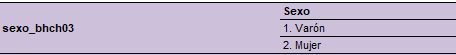

In [ ]:
df_encuesta_final['sexo_bhch03'].value_counts() ## Sexo del Bloque Individual

2    16632
1    12592
Name: sexo_bhch03, dtype: int64

De los encuestados hay 12592 Varones y 16632 Mujeres

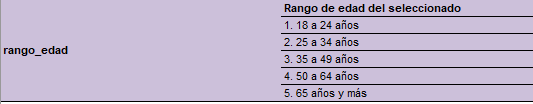

In [ ]:
df_encuesta_final['rango_edad'].value_counts()

3    8049
4    6413
5    5709
2    5633
1    3420
Name: rango_edad, dtype: int64

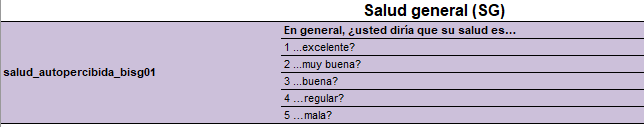

In [ ]:
df_encuesta_final['salud_autopercibida_bisg01'].value_counts()

3    12255
2     7462
4     5776
1     2913
5      818
Name: salud_autopercibida_bisg01, dtype: int64

Exiten en la encuesta 12255 individuos que se perciben con buena salud, luego 7462 con muy buena salud, 5776 con salud regular, 2913 con excelente salud y finalmente 828 salud mala.

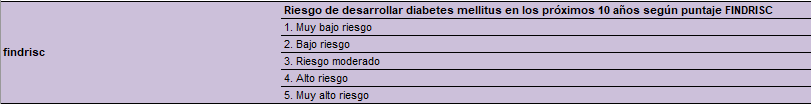

In [ ]:
df_encuesta_final['findrisk'].value_counts()

2.0    4208
1.0    3499
4.0    2561
3.0    2537
5.0     291
Name: findrisk, dtype: int64

In [ ]:
## SUBMUESTRA = 1  para los pasos 2 y 3
df_encuesta_final['submuestra'].value_counts()

1    21719
0     7505
Name: submuestra, dtype: int64

In [ ]:
df_encuesta_final.isnull()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,sexo_bhch03,edad_bhch04,rango_edad,...,bimq01,bimq05,bimq05_01,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisk,colesterol_bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29219,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False
29220,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,True,False,False
29221,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,True,False,False
29222,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,False,False


In [ ]:
df_encuesta_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      29224 non-null  object 
 1   cod_provincia                           29224 non-null  object 
 2   region                                  29224 non-null  object 
 3   tamanio_aglomerado                      29224 non-null  object 
 4   aglomerado                              29224 non-null  object 
 5   localidades_150                         29224 non-null  object 
 6   submuestra                              29224 non-null  object 
 7   sexo_bhch03                             29224 non-null  object 
 8   edad_bhch04                             29224 non-null  int64  
 9   rango_edad                              29224 non-null  object 
 10  sl_condicion_actividad                  29224 non-null  ob

###Filtrado del Dataframe

#####**Paso 2 Mediciones Antropométricas**

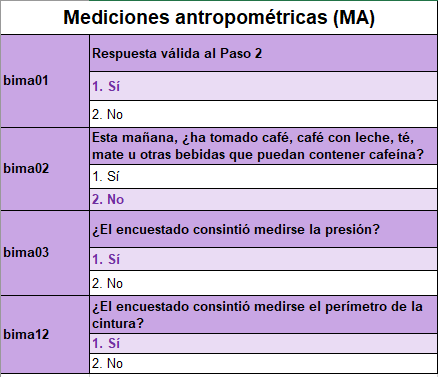

In [ ]:
cond  = (df_encuesta_final['submuestra'] == '1') ## submuestra para el paso 2 y 3
cond1 = (df_encuesta_final["bima01"] == '1.0')   ## Encuestado accedió a las Mediciones Antropométricas (1.Si)
cond2 = (df_encuesta_final['bima02'] == '2.0')   ## Si No bebió cafe o te (2.No ) => está en condiciones de tomarse la presión
cond3 = (df_encuesta_final["bima03"] == '1.0')   ## Consintió a tomarse la Presión (1.Si)
cond4 = (df_encuesta_final["bima12"] == '1.0')   ## Consintió a medirse el perímetro de la cintura

df_filtrado_ma = df_encuesta_final.loc[cond & cond1 | cond2 | cond3 | cond4]
df_filtrado_ma.shape

(16577, 65)

Los 16577 registros para las Mediciones Antropométricas informados en   [Caracterísitcas de la muestra](https://colab.research.google.com/drive/1GAjtZz5mcXqtNza310egUdb-nIJ3pARc#scrollTo=CkngdmaFqzZQ).


#####**Paso 3 Mediciones Químicas**

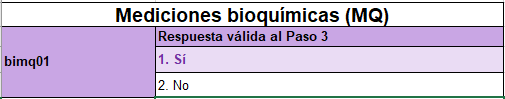

In [ ]:
cond5 =(df_encuesta_final["bimq01"] == '1.0')             #Accedio a las Mediciones bioquímicas
df_filtrado_mq = df_encuesta_final.loc[cond5]
df_filtrado_mq.shape

(5331, 65)

Los 5331 registros para las Mediciones Químicas informados en [Caracterísitcas de la muestra](https://colab.research.google.com/drive/1GAjtZz5mcXqtNza310egUdb-nIJ3pARc#scrollTo=CkngdmaFqzZQ).



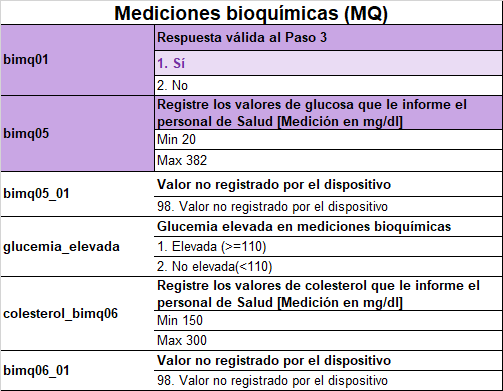

In [ ]:
cond6 =(df_encuesta_final["bimq05"] > 0)                   #Valores de glucemia mayores a 0
df_filtrado_glu=df_encuesta_final.loc[cond6]
df_filtrado_glu.shape

(5188, 65)

In [ ]:
df_encuesta_final['bimq05_01'].value_counts()             # 143 registros donde falló el dispositivo para la medición de glucosa

98.0    143
Name: bimq05_01, dtype: int64

In [ ]:
5188 + 143                                                ## Los datos son concistentes

5331


####Conclusión sobre el Filtrado
Para esta investigación se deben cumplir las 7 condiciones anteriormente mencionadas para predecir el valor FINDRISK

- cond = (df_encuesta_final['submuestra'] == '1') ## submuestra para el paso 2 y 3
- cond1 = (df_encuesta_final["bima01"] == '1.0')   ## Encuestado accedió a las Mediciones Antropométricas (1.Si)


 *Acá hay que tener en cuenta que tanto el IMC de autorreporte o el IMC de las mediciones antropometricas deben tener valor asignado.*

- cond1a = (df_encuesta_final['imc_categorias_autorreporte']!='99')
- cond1b = (df_filtrado['imc_categorias_bima']!='99.0')

- cond2 = (df_encuesta_final['bima02'] == '2.0')   ## Si No bebió cafe o te (2.No ) => está en condiciones de tomarse la presión

- cond3 = (df_encuesta_final["bima03"] == '1.0')   ## Consintió a tomarse la Presión (1.Si)

- cond4 = (df_encuesta_final["bima12"] == '1.0')   ## Consintió a medirse el perímetro de la cintura

- cond5 =(df_encuesta_final["bimq01"] == '1.0')    #Accedio a las Mediciones bioquímicas

- cond6 =(df_encuesta_final["bimq05"] > 0)               #Valores de glucemia mayores a 0



In [ ]:
cond1a = (df_encuesta_final['imc_categorias_autorreporte']!='99')
cond1b = (df_encuesta_final['imc_categorias_bima']!='99.0')

In [ ]:
df_filtrado = df_encuesta_final.copy()
df_filtrado = df_filtrado.loc[cond & cond1 & (cond1a | cond1b) & cond2 & cond3 & cond4 & cond5 & cond6]

df_filtrado.shape

(5062, 65)

Nuestro dataset a evaluar tendrá 5062 registros.

In [ ]:
df_filtrado.describe()

,edad_bhch04,peso_bipc04,peso_bipc04_99,altura_bipc05,altura_bipc05_99,imc_autorreporte,promedio_fv_diario,bima04_01_a,bima04_01_b,bima04_02_a,...,altura_bima07,peso_bima10,imc_bima,perim_cintura_bima13,bima14,bimq05,bimq05_01,findrisk,colesterol_bimq06,bimq06_01
count,5062.000000,4887.000000,175.0,4744.000000,318.0,4642.000000,4942.000000,5062.000000,5062.000000,5062.000000,...,5060.000000,5041.000000,5039.000000,5062.000000,5062.000000,5062.000000,0.0,4167.000000,4741.00000,321.0
mean,46.274990,75.351340,99.0,165.765388,99.0,27.418753,2.047584,132.622481,85.673054,130.639075,...,164.247233,76.136679,28.191177,92.210589,1.614184,80.764322,NaN,2.400288,187.68783,98.0
std,17.922792,16.783723,0.0,9.622408,0.0,5.416391,1.681387,22.232615,13.188329,21.669235,...,9.778691,17.445851,5.861351,16.068771,0.486836,30.903314,NaN,1.144223,30.74744,0.0
min,18.000000,39.000000,99.0,120.000000,99.0,13.840000,0.000000,68.000000,30.000000,67.000000,...,132.000000,37.000000,15.820000,49.000000,1.000000,20.000000,NaN,1.000000,150.00000,98.0
25%,31.000000,63.000000,99.0,159.000000,99.0,23.720000,1.000000,117.000000,77.000000,115.000000,...,157.000000,64.000000,24.010000,81.000000,1.000000,65.000000,NaN,1.000000,163.00000,98.0
50%,44.000000,74.000000,99.0,165.000000,99.0,26.640000,1.570000,129.000000,85.000000,127.000000,...,164.000000,74.000000,27.360000,92.000000,2.000000,79.000000,NaN,2.000000,180.00000,98.0
75%,60.000000,85.000000,99.0,172.000000,99.0,30.467500,2.710000,145.000000,93.000000,142.000000,...,171.000000,86.000000,31.460000,102.000000,2.000000,92.000000,NaN,3.000000,205.00000,98.0
max,97.000000,200.000000,99.0,200.000000,99.0,60.850000,15.430000,245.000000,168.000000,254.000000,...,201.000000,200.000000,65.310000,209.000000,2.000000,382.000000,NaN,5.000000,300.00000,98.0


###Limpieza de Datos




In [ ]:
if df_filtrado.duplicated().sum()==0:
   print ("No exiten Duplicados")
else:
   print("Exiten Duplicados")

No exiten Duplicados


####Analisis de Valores Nulos

In [ ]:
df_filtrado.isnull().sum()

id                                     0
cod_provincia                          0
region                                 0
tamanio_aglomerado                     0
aglomerado                             0
                                    ... 
findrisk                             895
colesterol_bimq06                    321
bimq06_01                           4741
colesterol_elevado                     0
prevalencia_colesterol_combinada       0
Length: 65, dtype: int64



> Bloque con sangría


En cuanto a **FindRisk** presenta 895 valores nulos, o sea que no fueron valorizados en función de las variables edad, IMC, perímetro cintura, actividad física, consumo de frutas y verduras, uso de antihipertensivos, antecedentes de glucemia elevada, historia familiar de diabetes .

Con respecto a la **medición del colesterol** (colesterol_bimq06) podemos decir que se registraron 4741 mediciones y quedaron  321 valores nulos por **falla del dispositivo** de medición (bimq06_01) donde 4741 no falló.


- FindRisk

In [ ]:
nulos = df_filtrado['findrisk'].isnull()
nulos
porcentaje_nulos = nulos.mean() * 100
print("El porcentaje de valores nulos de FindRisk es del {:.2f}".format(porcentaje_nulos))

El porcentaje de valores nulos de FindRisk es del 17.68


In [ ]:
print(df_filtrado.findrisk.isnull().value_counts())

False    4167
True      895
Name: findrisk, dtype: int64


In [ ]:
df_filtrado.loc[df_filtrado['findrisk'].isnull()==True,'findrisk']=9

Exiten 895 valores nulos y los recategorizamos con el valor 9 que representa 'Sin Evaluar' o 'Sin Valorizar'

- Nivel de Actividad Física

In [ ]:
df_filtrado['nivel_actividad_fisica'].value_counts()

3.0    2317
2.0    1826
1.0     878
nan      41
Name: nivel_actividad_fisica, dtype: int64

In [ ]:
df_filtrado.loc[df_filtrado['nivel_actividad_fisica']=='nan','nivel_actividad_fisica']='99.0'

In [ ]:
df_filtrado['nivel_actividad_fisica'].isnull().value_counts()

False    5062
Name: nivel_actividad_fisica, dtype: int64

Existen 41 valores Nan y le asigno nivel de actividad física '99.0' que se corresponde a No Sabe/ No contesta.

Los datos de la columna nivel_actividad_fisica quedaron completos

- Perímetro de la Cintura

In [ ]:
df_filtrado['perim_cintura_bima13'].isnull().value_counts()

False    5062
Name: perim_cintura_bima13, dtype: int64

Los datos de la columna perim_cintura_bima13 estan completos.

- IMC (Indice de Masa Corporal)

In [ ]:
df_filtrado['imc_bima'].isnull().value_counts()

False    5039
True       23
Name: imc_bima, dtype: int64

Tenemos 23 registros donde no está calculado el *IMC*

In [ ]:
df_filtrado['imc_autorreporte'].isnull().value_counts()

False    4642
True      420
Name: imc_autorreporte, dtype: int64

Hay 420 registros donde por autorreporte no está indicado el valor IMC

Tendría que ver si de los 23 registros (imc_bima) se encuentran seteados en imc_autorreporte

¿Puedo usar el valor IMC_AUTORREPORTE en los casos donde no esté seteada IMC_BIMA?

In [ ]:
cond= df_filtrado['imc_categorias_bima']=='99.0'
cond2=df_filtrado['imc_categorias_autorreporte']!='99'
df_= df_filtrado.loc[cond & cond2]
df_.shape


(23, 65)

Puedo usar esta variable en los casos donde no esté seteada  IMC_BIMA ya que la cantidad es 23. Creo una nueva Variable con la combinación de los valores por autorreporte y los de la medición antropométrica.

In [ ]:
df_filtrado['imc_bima_new'] = 0
df_filtrado['imc_bima_new']=df_filtrado['imc_bima']
# Asignamos diferentes valores basados en las condiciones
df_filtrado.loc[cond & cond2, 'imc_bima_new'] = df_filtrado.loc[cond & cond2, 'imc_autorreporte']
#print(df_filtrado.loc[cond & cond2, 'imc_bima_new'])
df_filtrado['imc_bima_new'].isnull().value_counts()

False    5062
Name: imc_bima_new, dtype: int64

- Medicación para la presion

In [ ]:
df_filtrado['medicacion_biha07'].value_counts()

nan    4189
2.0     607
1.0     266
Name: medicacion_biha07, dtype: int64

Existen 4189 encuestados que no responden si toman medicación para la Hipertensión.
Veo que sucede con la variable prevalencia de hipertensión por autorreporte


In [ ]:
df_filtrado['prevalencia_hipertension_autorreporte'].value_counts()

2.0     2909
1.0     1816
nan      313
99.0      24
Name: prevalencia_hipertension_autorreporte, dtype: int64

En la variable prevalencia de hipertención por autorreporte exiten 313 valores Nan y 24 correspondientes a No Sabe/ No Contesta

In [ ]:
df_filtrado['ta_elevada'].value_counts()

2.0    3044
1.0    2018
Name: ta_elevada, dtype: int64

Para las mediciones físicas de la presión arterial, los 5062 registros están todos categorizados.

In [ ]:
df_filtrado['prevalencia_hipertension_combinada'].value_counts()

2.0    2512
1.0    2213
nan     337
Name: prevalencia_hipertension_combinada, dtype: int64

Esta variable tiene 337 valores NaN que es una combinación entre lo que reportó el encuestado y los valores que se le tomaron en la medición física. Recategorizo con '99.0' (No Sabe/No contesta) los valores NaN.


In [ ]:
df_filtrado.loc[df_filtrado['prevalencia_hipertension_combinada']=='nan','prevalencia_hipertension_combinada']='99.0'

In [ ]:
df_filtrado['prevalencia_hipertension_combinada'].isna().sum()

0

Para el caso de Medicación HPA me quedo con la variable ta_elevada que se corresponde con las mediciones realizadas a los encuestados.

- Diagnosticaron Diabetes

In [ ]:
df_filtrado['bidi01'].isnull().sum()

0

Están todos los registros categorizados

- Valores de Glucemia

In [ ]:
nulos=df_filtrado.bimq05.isna()
nulos
porcentaje_nulos = nulos.mean() * 100
print("El porcentaje de valores nulos del Valor de Glucemia (bimq05) es del {:.2f}".format(porcentaje_nulos))

El porcentaje de valores nulos del Valor de Glucemia (bimq05) es del 0.00


####Eliminacion de columnas

Considerando que en el dataset hay columnas que no son relevantes para este análisis se procederá a eliminarlas.

In [ ]:
# Para eliminar columnas, puedes usar el método drop()
columnas_a_eliminar = ['id','cod_provincia','region','tamanio_aglomerado','aglomerado','localidades_150','submuestra',
'sl_condicion_actividad','consumo_tabaco_100','hta_nofumadores','peso_bipc04']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)



In [ ]:
columnas_a_eliminar=['peso_bipc04_99','altura_bipc05','altura_bipc05_99','promedio_fv_diario','control_colesterol_autorreporte',
'prevalencia_colesterol_autorreporte','alcohol_consumo_regular_riesgo','alcohol_consumo_episodico_excesivo']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)


In [ ]:

columnas_a_eliminar= ['bima01','bima02','bima03','bima04_01_a','bima04_01_b','bima04_02_a','bima04_02_b',
'bima04_03_a','bima04_03_b','diabetes_embarazo_bidi02','glucemia_elevada']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)


In [ ]:
columnas_a_eliminar=['bima06','altura_bima07','bima09','peso_bima10','bima12','bima14','bimq01','bimq05_01','prevalencia_glucemia_elevada_combinada',
                     'colesterol_bimq06','bimq06_01','colesterol_elevado','prevalencia_colesterol_combinada']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)

Como ya tenemos completos los valores IMC en imc_bima_new tanto las variables categóricas 'imc_categorias_bima' y 'imc_categorias_autorreporte'  como imc_bima y imc_autorreporte las elimino.

In [ ]:
columnas_a_eliminar=['imc_categorias_bima','imc_categorias_autorreporte','imc_bima','imc_autorreporte']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)

In [ ]:
df_filtrado.columns

Index(['sexo_bhch03', 'edad_bhch04', 'rango_edad',
       'salud_autopercibida_bisg01', 'nivel_actividad_fisica',
       'medicacion_biha07', 'prevalencia_hipertension_autorreporte',
       'consumo_fv', 'bidi01', 'bidi06_01', 'bidi06_02', 'promedio_sistolica',
       'promedio_diastolica', 'ta_elevada',
       'prevalencia_hipertension_combinada', 'perim_cintura_bima13', 'bimq05',
       'findrisk', 'imc_bima_new'],
      dtype='object')

####Transformación - Cálculo del Puntaje FindRisk

Como prueba, realicé el cálculo del Puntaje FindRisk para poder compararlo con la variable presente en el conjunto de datos (findrisk). Los resultados mostraron que todos los registros fueron valorizados correctamente, lo que significa que no hay valores faltantes para esta variable (FindRisk_New) en el conjunto de datos.


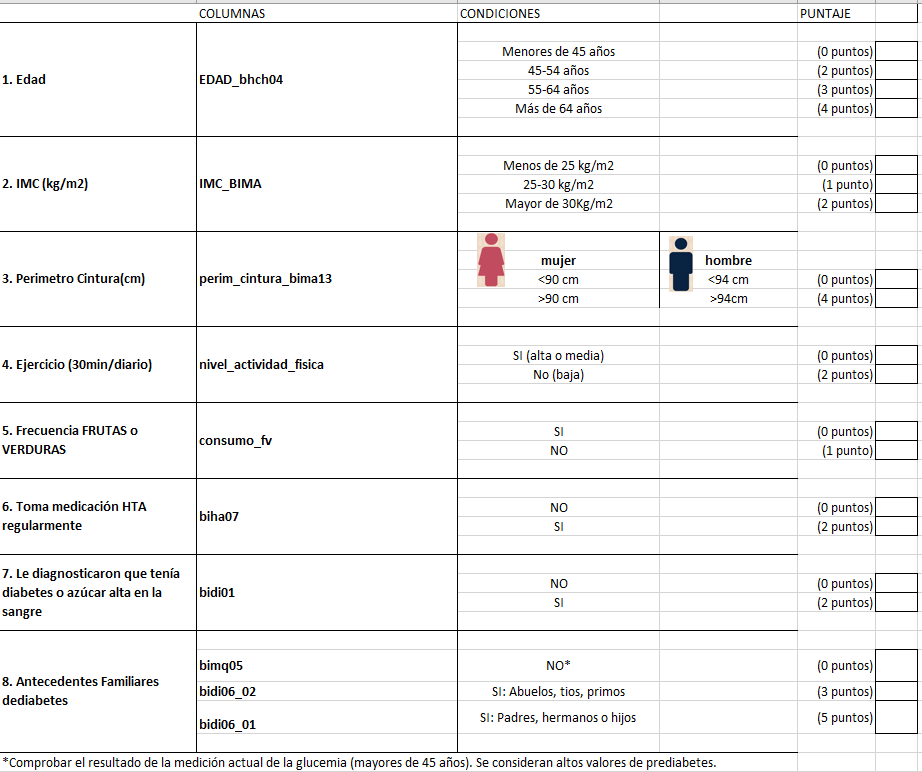

In [ ]:
#Creo las nuevas columnas
df_filtrado['puntajeFindRisk'] = 0
df_filtrado['prediabetes'] = 0
df_filtrado['FindRisk_New'] = 0

for index, row in df_filtrado.iterrows():
    puntaje = 0
    edad = row['edad_bhch04']
    if (45.0 <= edad <= 55.0):
        puntaje = 2
    elif (55.0 <= edad <= 64.0):
        puntaje = 3
    elif (edad > 64.0):
        puntaje = 4

    imc = row['imc_bima_new']
    if (25.00 <= imc <= 30.00):
       puntaje = puntaje + 1
    elif (imc > 30.00):
       puntaje = puntaje + 2

    sexo = row['sexo_bhch03']
    perim_cintura = row['perim_cintura_bima13']
    if (sexo == '1'):
        if (perim_cintura > 94):
            puntaje = puntaje + 4  # Varón
    elif (sexo == '2'):
        if (perim_cintura > 90):
            puntaje = puntaje + 4  # Mujer


    nivel_act_fisica = row['nivel_actividad_fisica']
    if (nivel_act_fisica == '3'):
        puntaje = puntaje + 2  # Baja

    consumo_fv = row['consumo_fv']
    if (consumo_fv == '2'):
        puntaje = puntaje + 2  # No consume Fruta y Verduras

    med_presion = row['medicacion_biha07']
    if (med_presion == '1'):
        puntaje = puntaje + 2  # Toma medicación Hipertensión
    elif(row['prevalencia_hipertension_autorreporte'] == '1'):
        puntaje = puntaje + 2

    diag_diabetes = row['bidi01']
    if (diag_diabetes == '1'):
        puntaje = puntaje + 2  # Le diagnosticaron diabetes

    ant_abuelos = row['bidi06_02']
    if (ant_abuelos == '1'):
        puntaje = puntaje + 3  # Antecedentes diabetes en abuelos

    ant_padres = row['bidi06_01']
    if (ant_padres == '1'):
        puntaje = puntaje + 5  # Antecedentes diabetes en padres
    elif (ant_padres == '2' and ant_abuelos == '2' and edad > 45):
        valor_glucemia = row['bimq05']
        if valor_glucemia >= 110:
            df_filtrado.at[index, 'prediabetes'] = 1  # PREDIABETES
        else:
            puntaje = puntaje

    df_filtrado.at[index, 'puntajeFindRisk'] = puntaje

    # Actualizo la columna "FindRisk_New" basada en el puntaje FindRisk
    if 0 <= puntaje <= 7:
        df_filtrado.at[index, 'FindRisk_New'] = 1
    elif 8 <= puntaje <= 11:
        df_filtrado.at[index, 'FindRisk_New'] = 2
    elif 12 <= puntaje <= 14:
        df_filtrado.at[index, 'FindRisk_New'] = 3
    elif 15 <= puntaje <= 20:
        df_filtrado.at[index, 'FindRisk_New'] = 4
    elif puntaje >= 21:
        df_filtrado.at[index, 'FindRisk_New'] = 5




In [ ]:
# Verifico el resultado
print(df_filtrado.loc[:,['puntajeFindRisk','FindRisk_New','findrisk','prediabetes']])

       puntajeFindRisk  FindRisk_New  findrisk  prediabetes
8                    5             1       2.0            0
11                  12             3       3.0            0
13                  18             4       9.0            0
14                   8             2       2.0            0
15                   2             1       1.0            0
...                ...           ...       ...          ...
26864               12             3       3.0            0
26871               10             2       9.0            0
26876                3             1       1.0            0
26886                3             1       1.0            0
26894               12             3       4.0            0

[5062 rows x 4 columns]


In [ ]:
df_filtrado['puntajeFindRisk'].isnull().value_counts()

False    5062
Name: puntajeFindRisk, dtype: int64

In [ ]:
findrisk_new_counts=df_filtrado['FindRisk_New'].value_counts()
findrisk_new_counts

1    1923
2    1450
4     877
3     772
5      40
Name: FindRisk_New, dtype: int64

In [ ]:
findrisk_new_counts.sum()

5062

Después de realizar el cálculo del puntaje FindRisk los 5062 registros fueron valorizados según las distintas categorías.

In [ ]:
df_filtrado['prediabetes'].value_counts()

0    4970
1      92
Name: prediabetes, dtype: int64

Estos 92 casos de prediabetes no fueron clasificados en el dataset original como tales.


##Análisis Descriptivo

Para ayudarme a comprender, organizame y obtener información relevante en la exploración del conjunto de Datos, me hice las siguientes preguntas:

1. ¿Cuál es la distribución de los puntajes **FINDRISK** en la muestra?

2. ¿Cuál es la media, mediana y desviación estándar de los puntajes FINDRISK?

3. ¿Hay alguna relación entre la **Edad** (edad_bhch04), y el puntaje **FINDRISK**? ¿El riesgo de diabetes aumenta con la edad?

4. ¿Hay relación entre el Rango de Edad (rango_edad), y el puntaje FINDRISK?

5. ¿Existe relación entre el **IMC** y el puntaje **FINDRISK**?

6. ¿Hay diferencias en los puntajes FINDRISK según el **sexo** (sexo_bhch03)?

7. ¿Existe alguna relación entre el **nivel de actividad física** (nivel_actividad_fisica) y el puntaje **FINDRISK**? ¿Las personas que realizan más actividad física tienen un menor riesgo de desarrollar diabetes?

8. ¿Hay diferencias en los puntajes **FINDRISK** entre diferentes grupos de **consumo de frutas y verduras** (consumo_fv)? ¿El consumo de frutas y verduras se asocia con un menor riesgo de diabetes?

9. ¿Cómo se distribuyen los puntajes **FINDRISK** en relación con la presencia de otras enfermedades crónicas, como la **hipertensión o el colesterol alto**?

10. ¿El puntaje **FINDRISK** varía según la **situación laboral** (SL_CONDICION_ACTIVIDAD) de los encuestados? ¿Hay alguna diferencia en el riesgo de diabetes entre los diferentes grupos laborales?

11. ¿Existe alguna relación entre la **percepción de la salud general** (SALUD_AUTOPERCIBIDA_bisg01) y el puntaje FINDRISK? ¿Las personas que perciben su salud como regular o mala tienen un mayor riesgo de desarrollar diabetes?


###Gráficas

#### 1. Distribución del Puntaje FINDRISK

In [ ]:
import matplotlib.pyplot as plt

findrisk_counts=df_filtrado['findrisk'].value_counts()
findrisk_counts

2.0    1309
1.0    1108
9.0     895
4.0     840
3.0     817
5.0      93
Name: findrisk, dtype: int64

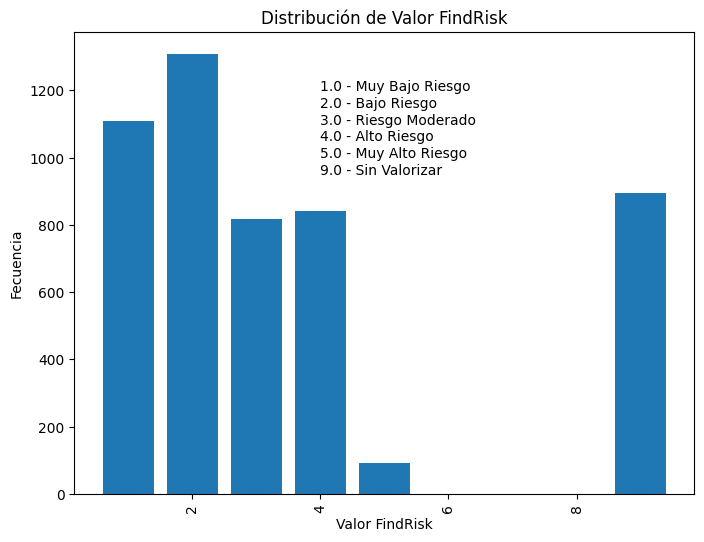

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(findrisk_counts.index, findrisk_counts.values)
plt.xlabel('Valor FindRisk')
plt.ylabel('Fecuencia')
plt.title('Distribución de Valor FindRisk')
plt.xticks(rotation=90)
plt.text(4, 1200, f'1.0 - Muy Bajo Riesgo')
plt.text(4, 1150, f'2.0 - Bajo Riesgo')
plt.text(4, 1100, f'3.0 - Riesgo Moderado')
plt.text(4, 1050, f'4.0 - Alto Riesgo')
plt.text(4, 1000, f'5.0 - Muy Alto Riesgo')
plt.text(4, 950,  f'9.0 - Sin Valorizar')

plt.show()

Este gráfico nos muestra que hay más individuos con *Bajo Riesgo* de contraer diabetes en los próximos 10 años, luego le siguen los de *Muy Bajo Riesgo*, *Sin Valorizar*, *Alto Riesgo*, *Riesgo Moderado* y finalmente con muy poca cantidad los individuos con *Muy Alto Riesgo*.

#####Sesgo

In [ ]:
group_data = list(findrisk_counts.values)
group_data

[1309, 1108, 895, 840, 817, 93]

In [ ]:
from scipy.stats import skew

# Calculo el coeficiente de asimetría
asimetria = skew(group_data)

if asimetria < 0:
    print("La distribución tiene sesgo hacia la izquierda.")
else:
    print("La distribución no tiene sesgo hacia la izquierda.")


La distribución tiene sesgo hacia la izquierda.


Que la distribución tenga sesgo hacia la izquierda me dice que la mayor cantidad de datos está a la derecha.

#### 2. Promedio , Mediana y la Desviación Estándar

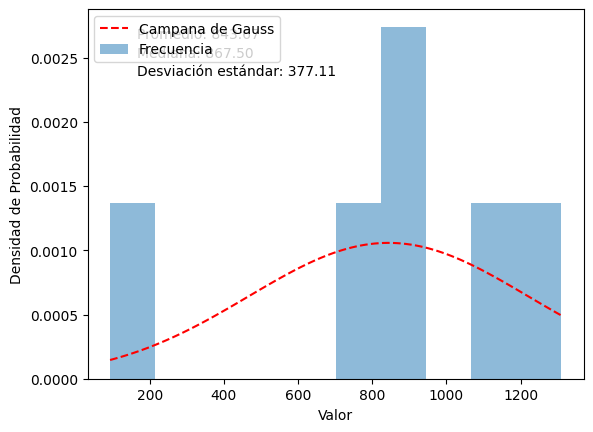

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

group_data = list(findrisk_counts.values)
group_names = list(findrisk_counts.index)


# Calculo el promedio , mediana y la desviación estándar
promedio = np.mean(group_data)
mediana = np.median(group_data)
desviacion_estandar = np.std(group_data)

# Creo la figura y los ejes del gráfico
fig, ax = plt.subplots()

# Creo el rango de valores para la curva de campana de Gauss
x = np.linspace(min(group_data), max(group_data), 100)

# Calculo la función de densidad de probabilidad de la distribución normal
pdf = norm.pdf(x, promedio, desviacion_estandar)

# Dibujo la curva de campana de Gauss
ax.plot(x, pdf, color='red', linestyle='--', label='Campana de Gauss')

# Dibujo el gráfico de densidad
ax.hist(group_data, density=True, alpha=0.5, label='Frecuencia')

# Establezco las etiquetas de los ejes x y y
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad de Probabilidad')

# Muestro el promedio y la desviación estándar en el gráfico
ax.text(0.10, 0.95, f'Promedio: {promedio:.2f}', ha='left', va='top', transform=ax.transAxes)
ax.text(0.10,0.9, f'Mediana: {mediana:.2f}',ha='left',va='top',transform=ax.transAxes)
ax.text(0.10, 0.85, f'Desviación estándar: {desviacion_estandar:.2f}', ha='left', va='top', transform=ax.transAxes)

# Muestro la leyenda
ax.legend()

# Muestro el gráfico
plt.show()



Otra forma de ver la distribución del Puntaje Find Risk.

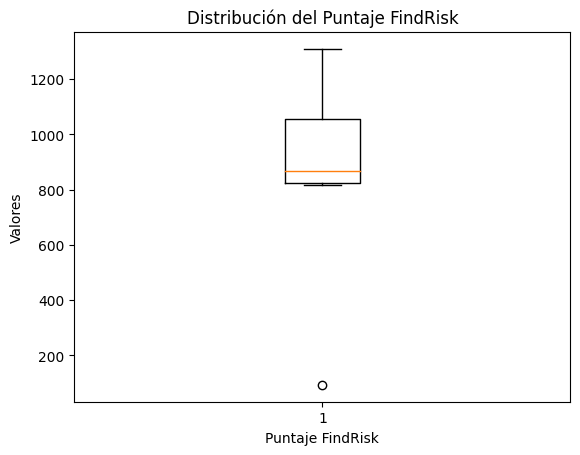

In [ ]:
plt.boxplot(group_data)
plt.xlabel('Puntaje FindRisk')
plt.ylabel('Valores')
plt.title('Distribución del Puntaje FindRisk')
plt.show()



La media está alrededor de 867, existen valores atipicos, ya que para el puntaje FindRisk de Muy Alto Riesgo de contraer diabetes en los próximos 10 años es muy bajo en comparación al resto.

#### 3. Relación con la Edad


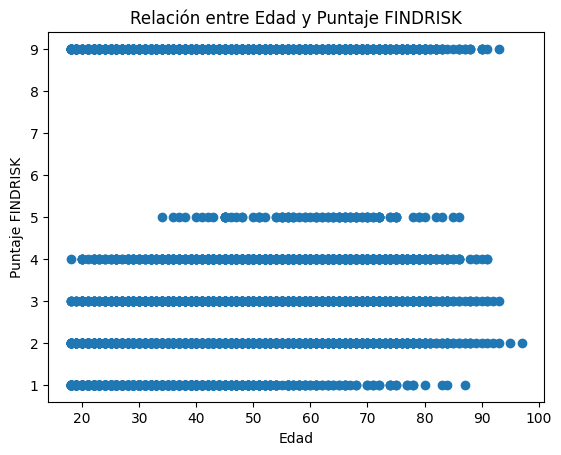

In [ ]:
# Datos de edad y puntaje FINDRISK
edades = df_filtrado['edad_bhch04']
findrisk = df_filtrado['findrisk']

# Creo el gráfico de dispersión
plt.scatter(edades, findrisk)
plt.xlabel('Edad')
plt.ylabel('Puntaje FINDRISK')
plt.title('Relación entre Edad y Puntaje FINDRISK')

# Muestro el gráfico
plt.show()

En gráfico de dispersión se observa que aproximadamente a los 34/35 años de edad los individuos comienzan a tener un "Muy Alto Riesgo" de contraer diabetes en los próximos 10 años.

#### 4. Relación con  los Rangos de Edad

In [ ]:
# Creo un diccionario para mapear los códigos de rango de edad
# a etiquetas descriptivas según las características de la muestra
rangos_edad_map = {'1':'18-24', '2': '25-34', '3': '35-49', '4': '50-64', '5': '64+'}

# Mapear los códigos de rango de edad a etiquetas descriptivas en una nueva columna
df_filtrado.loc[:, 'rango_edad_new'] = df_filtrado['rango_edad'].map(rangos_edad_map)


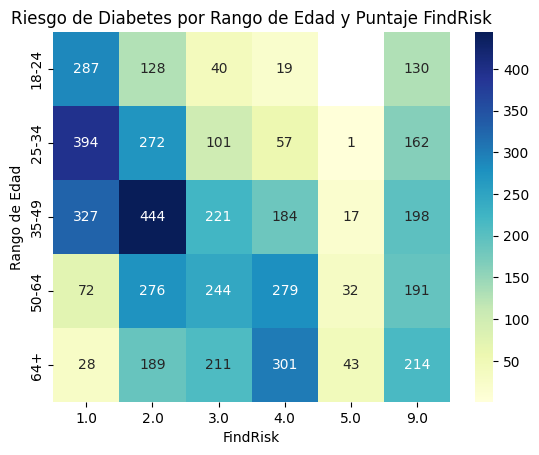

In [ ]:
import seaborn as sns
# Creo una matriz de correlación o datos para el heatmap
correlation_matrix = df_filtrado.groupby(['rango_edad_new','findrisk']).size().unstack()

# Creo el heatmap
sns.heatmap(data=correlation_matrix, cmap='YlGnBu', annot=True, fmt='g')

# Personalizo el heatmap
plt.xlabel('FindRisk')
plt.ylabel('Rango de Edad')
plt.title('Riesgo de Diabetes por Rango de Edad y Puntaje FindRisk')

# Muestro el heatmap
plt.show()


El mapa de calor muestra la distribución de FindRisk en relación con los rangos de edad. Se puede observar que hay una mayor cantidad de individuos en el rango de edad de 35-49 años con un "Bajo Riesgo" (2.0) de contraer diabetes en los próximos 10 años, seguido por aquellos en el rango de edad de 25-34 años con un "Muy Bajo Riesgo" (1.0). Por otro lado, los individuos con un "Muy Alto Riesgo" (5.0) son muy pocos.


#### 5. Relación con el Sexo

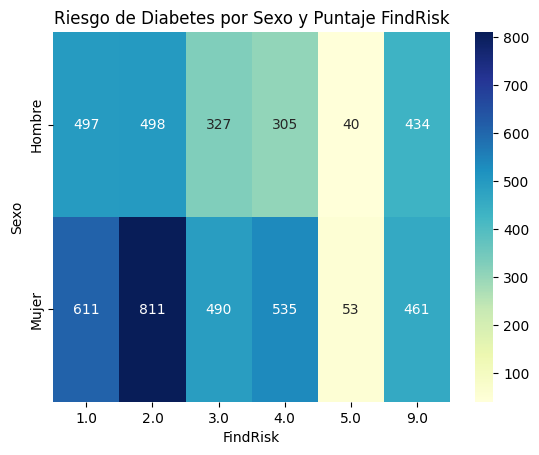

In [ ]:
sexo = {'1':'Hombre','2':'Mujer'}
# Mapeo los códigos de sexo a etiquetas descriptivas en una nueva columna
df_filtrado.loc[:, 'sexo_new'] = df_filtrado['sexo_bhch03'].map(sexo)

# Creo una matriz de correlación o datos para el heatmap
correlation_matrix = df_filtrado.groupby(['sexo_new','findrisk']).size().unstack()
sns.heatmap(data=correlation_matrix, cmap='YlGnBu', annot=True, fmt='g')

# Personalizar el heatmap
plt.xlabel('FindRisk')
plt.ylabel('Sexo')
plt.title('Riesgo de Diabetes por Sexo y Puntaje FindRisk')

# Mostrar el heatmap
plt.show()




Según el sexo, podemos observar que las mujeres son las que presentan la mayor cantidad de casos con "Muy Bajo Riesgo" (1.0) y "Bajo Riesgo" (2.0) de contraer diabetes.

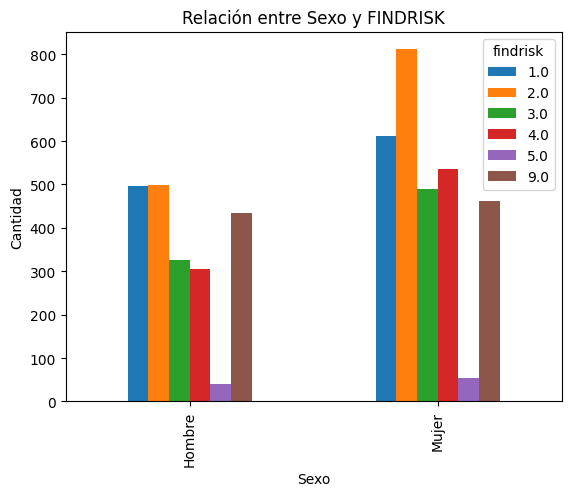

In [ ]:
tabla_cruzada = pd.crosstab(df_filtrado['sexo_new'], df_filtrado['findrisk'])
# Grafico el gráfico de barras
tabla_cruzada.plot.bar()

# Establezco los títulos y etiquetas de los ejes
plt.title('Relación entre Sexo y FINDRISK')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')

# Muestro el gráfico
plt.show()


#### 6. Relacion con el Nivel de Actividad Física

In [ ]:
df_filtrado['nivel_actividad_fisica'].value_counts()

3.0     2317
2.0     1826
1.0      878
99.0      41
Name: nivel_actividad_fisica, dtype: int64

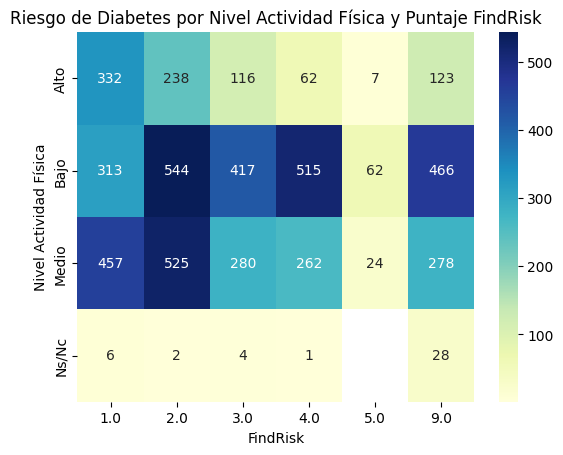

In [ ]:
# Creo un diccionario para mapear los códigos nivel de actividad física
# a etiquetas descriptivas según las características de la muestra
actividad_fisica = {'1.0':'Alto', '2.0': 'Medio', '3.0': 'Bajo', '99.0': 'Ns/Nc'}

# Mapeo los códigos de rango de edad a etiquetas descriptivas en una nueva columna
df_filtrado.loc[:, 'na_fisica_new'] = df_filtrado['nivel_actividad_fisica'].map(actividad_fisica)

# Creo una matriz de correlación o datos para el heatmap
correlation_matrix = df_filtrado.groupby(['na_fisica_new','findrisk']).size().unstack()

# Creo el heatmap
sns.heatmap(data=correlation_matrix, cmap='YlGnBu', annot=True, fmt='g')

# Personalizo el heatmap
plt.xlabel('FindRisk')
plt.ylabel('Nivel Actividad Física')
plt.title('Riesgo de Diabetes por Nivel Actividad Física y Puntaje FindRisk')

# Muestro el heatmap
plt.show()



El análisis de los datos revela que existe una mayor cantidad de individuos con un "Bajo Riesgo" (2.0) de contraer diabetes en los próximos 10 años. Además, se puede notar que este grupo de individuos tiende a tener niveles de actividad
física considerados "Medio" y "Bajo". Esta información sugiere una posible asociación entre la actividad física y el riesgo de diabetes, ya que aquellos con niveles de actividad física más bajos parecen presentar un mayor riesgo de desarrollar la enfermedad.

#### Matriz de Correlación

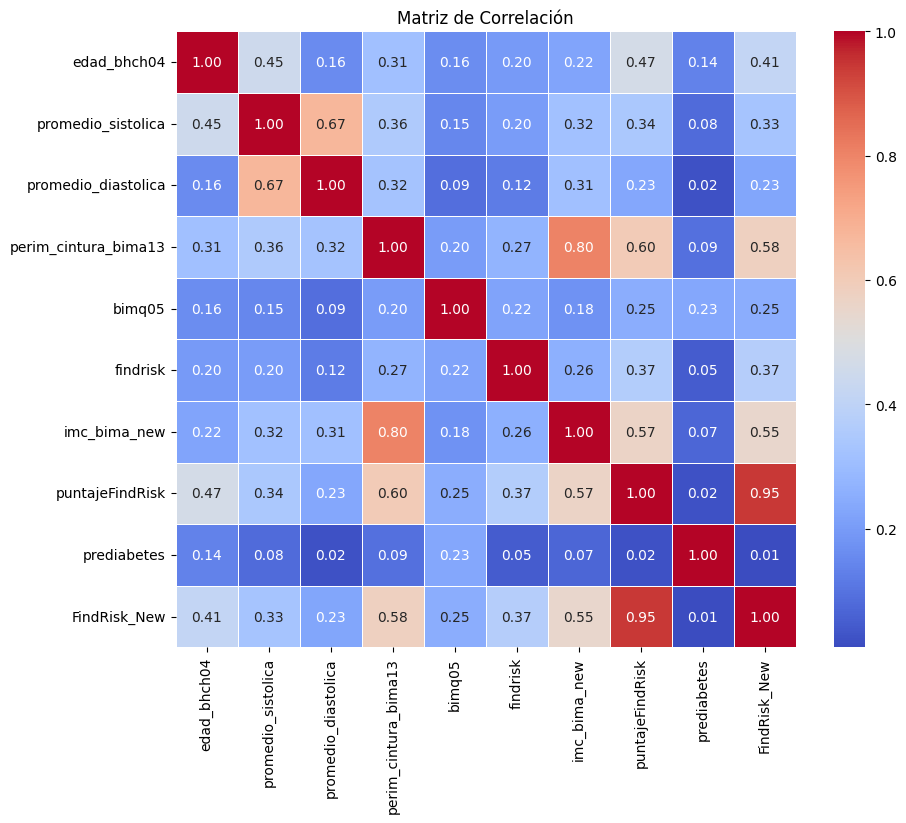

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu dataset está en un DataFrame llamado "df"
correlation_matrix = df_filtrado.corr(numeric_only=True)

# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Creamos el mapa de calor con la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostramos el gráfico
plt.title('Matriz de Correlación')
plt.show()



De la matriz de Correlación podemos observar lo siguiente:

**Edad_bhch04** tiene una correlación moderada positiva con promedio_sistolica (0.45) y una correlación débil positiva con promedio_diastolica (0.16). Esto sugiere que a medida que aumenta la edad_bhch04, tiende a haber un aumento moderado en la presión sistólica y un aumento leve en la presión diastólica.

**Perim_cintura_bima13** muestra una correlación fuerte con imc_bima_new (0.80) y puntajeFindRisk (0.60). Esto indica que hay una fuerte relación entre el perímetro de cintura y el índice de masa corporal, así como con el puntaje de riesgo de diabetes calculado.

**PuntajeFindRisk** está moderadamente correlacionado con edad_bhch04 (0.47) y promedio_sistolica (0.34), lo que sugiere una relación con la edad y la presión sistólica.

**FindRisk_New** muestra una fuerte correlación con puntajeFindRisk (0.95).Además, presenta una correlación moderada con las demás variables involucradas en el cálculo de su valor, lo cual es correcto que así sea.


#### Comparación entre FindRisk y FindRisk_New

La idea es ver si hay diferencias significativas en las distribuciones de ambas variables.

In [ ]:
print(df_filtrado.loc[:,['puntajeFindRisk','FindRisk_New','findrisk','prediabetes']])

       puntajeFindRisk  FindRisk_New  findrisk  prediabetes
8                    5             1       2.0            0
11                  12             3       3.0            0
13                  18             4       9.0            0
14                   8             2       2.0            0
15                   2             1       1.0            0
...                ...           ...       ...          ...
26864               12             3       3.0            0
26871               10             2       9.0            0
26876                3             1       1.0            0
26886                3             1       1.0            0
26894               12             3       4.0            0

[5062 rows x 4 columns]


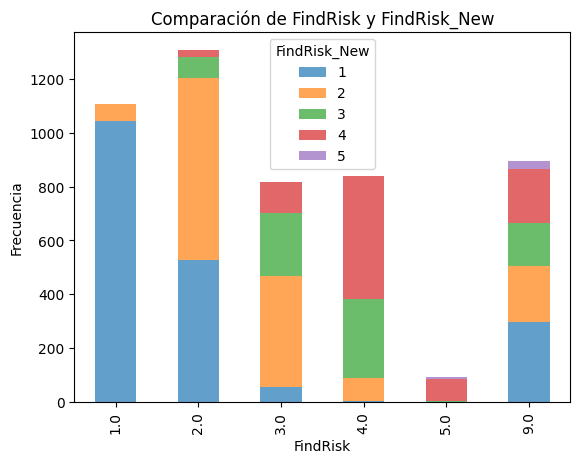

In [ ]:
import matplotlib.pyplot as plt
# Creo un DataFrame auxiliar con la frecuencia de cada valor en las columnas
count_df = df_filtrado.groupby(['findrisk', 'FindRisk_New']).size().unstack(fill_value=0)

# Creo el gráfico de barras
count_df.plot(kind='bar', stacked=True, alpha=0.7)

# Establezco etiquetas y título
plt.xlabel('FindRisk')
plt.ylabel('Frecuencia')
plt.title('Comparación de FindRisk y FindRisk_New')

# Muestro el gráfico
plt.show()


Existen diferencias entre FindRisk_New y FindRisk.
- En la categoría Muy Bajo Riesgo es donde más coinciden.
- Con respecto a la categoría "SIN VALORIZAR" se puede observar que después de hacer el cálculo se les asignó un valor.
- La categoría Muy Alto Riego practicamente pasó a estar categorizada en Alto Riesgo según el nuevo cálculo.



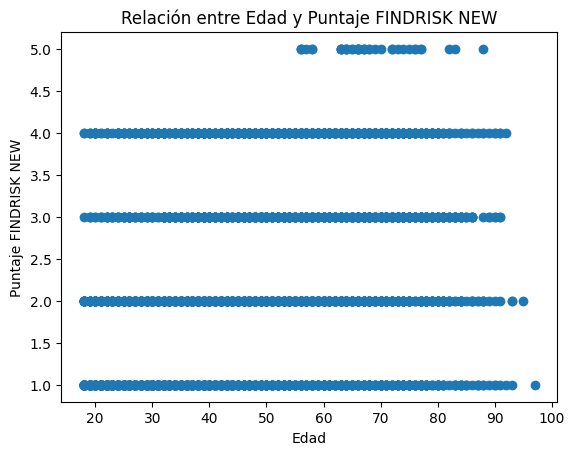

In [ ]:
# Datos de edad y puntaje FINDRISK
edades = df_filtrado['edad_bhch04']
findrisk = df_filtrado['FindRisk_New']

# Creo el gráfico de dispersión
plt.scatter(edades, findrisk)
plt.xlabel('Edad')
plt.ylabel('Puntaje FINDRISK NEW')
plt.title('Relación entre Edad y Puntaje FINDRISK NEW')

# Muestro el gráfico
plt.show()

La diferencia aquí está en la edad que comienza Muy Alto Riesgo. En FindRisk a los 34/35 años aproximadamente y en FindRisk_New a los 55 años.

- Distribución de FindRisk_New

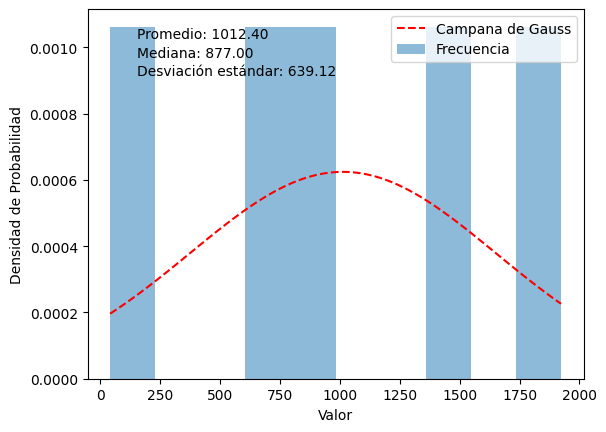

In [ ]:
import numpy as np
from scipy.stats import norm
group_data = list(findrisk_new_counts.values)
group_names = list(findrisk_new_counts.index)


# Calculo el promedio , mediana y la desviación estándar
promedio = np.mean(group_data)
mediana = np.median(group_data)
desviacion_estandar = np.std(group_data)

# Creo la figura y los ejes del gráfico
fig, ax = plt.subplots()

# Creo el rango de valores para la curva de campana de Gauss
x = np.linspace(min(group_data), max(group_data), 100)

# Calculo la función de densidad de probabilidad de la distribución normal
pdf = norm.pdf(x, promedio, desviacion_estandar)

# Dibujo la curva de campana de Gauss
ax.plot(x, pdf, color='red', linestyle='--', label='Campana de Gauss')

# Dibujo el gráfico de densidad
ax.hist(group_data, density=True, alpha=0.5, label='Frecuencia')

# Establezco las etiquetas de los ejes x y y
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad de Probabilidad')

# Muestro el promedio y la desviación estándar en el gráfico
ax.text(0.10, 0.95, f'Promedio: {promedio:.2f}', ha='left', va='top', transform=ax.transAxes)
ax.text(0.10,0.9, f'Mediana: {mediana:.2f}',ha='left',va='top',transform=ax.transAxes)
ax.text(0.10, 0.85, f'Desviación estándar: {desviacion_estandar:.2f}', ha='left', va='top', transform=ax.transAxes)

# Muestro la leyenda
ax.legend()

# Muestro el gráfico
plt.show()


In [ ]:
print(promedio)
print(mediana)
print(desviacion_estandar)

1012.4
877.0
639.1202077856716


In [ ]:
from scipy.stats import skew
# Calculo el coeficiente de asimetría
asimetria = skew(group_data)

if asimetria < 0:
    print("La distribución tiene sesgo hacia la izquierda.")
else:
    print("La distribución no tiene sesgo hacia la izquierda.")


La distribución tiene sesgo hacia la izquierda.


La distribución de FindRisk_New está sesgada hacia la izquierda igual que FindRisk.


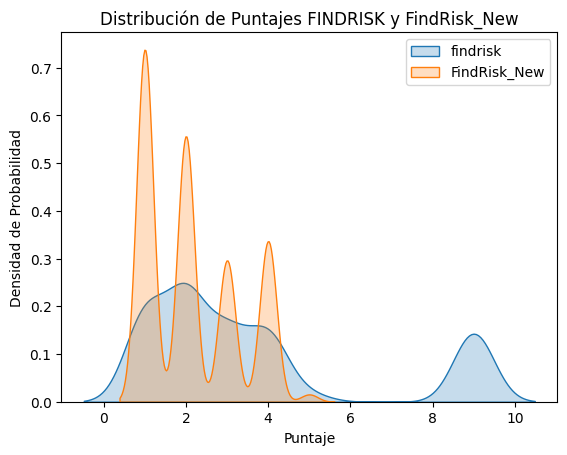

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de densidad para la variable "findrisk"
sns.kdeplot(df_filtrado['findrisk'], label='findrisk', fill=True)

# Crear el gráfico de densidad para la variable "FindRisk_New"
sns.kdeplot(df_filtrado['FindRisk_New'], label='FindRisk_New', fill=True)

# Etiquetas y título del gráfico
plt.xlabel('Puntaje')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución de Puntajes FINDRISK y FindRisk_New')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



El hecho de que FindRisk_New muestre una distribución con cuatro agrupamientos puede sugerir que las categorías asignadas, basadas en los puntajes utilizados para crear FindRisk_New, presentan una mayor variabilidad y capacidad para distinguir diferentes niveles de riesgo en comparación con findrisk, el cual solo muestra dos agrupamientos.

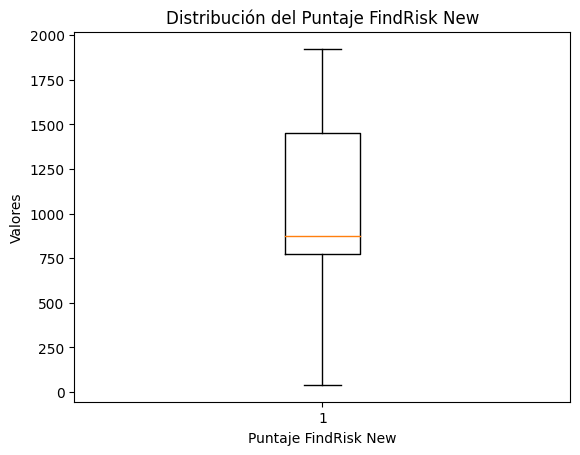

In [ ]:
plt.boxplot(group_data)
plt.xlabel('Puntaje FindRisk New')
plt.ylabel('Valores')
plt.title('Distribución del Puntaje FindRisk New')
plt.show()


- Comparo las distribuciones

In [ ]:
import numpy as np
from scipy.stats import ks_2samp

# Obtener los valores de las variables "findrisk" y "FindRisk_New" del DataFrame
findrisk_values = df_filtrado['findrisk'].dropna().astype(float)
FindRisk_New_values = df_filtrado['FindRisk_New'].astype(float)

# Realizar la prueba de Kolmogorov-Smirnov
resultado, p_valor = ks_2samp(findrisk_values, FindRisk_New_values)

# Imprimir el resultado
print("Estadístico de prueba:", resultado)
print("Valor p:", p_valor)

Estadístico de prueba: 0.18885815883050178
Valor p: 2.659755343686688e-79


El valor del estadístico de prueba es aproximadamente 0.188 y el valor p es extremadamente pequeño, 3.382131532888776e-81 (equivalente a 3.38 x 10^(-81)), lo que indica que la diferencia entre las distribuciones de las variables "findrisk" y "FindRisk_New" es muy significativa.

En conclusión la mayor variabilidad en las categorías de FindRisk_New puede permitir una mejor discriminación entre diferentes niveles de riesgo y, por lo tanto, proporcionar una mayor información y precisión en la predicción de los riesgos de contraer diabetes en los próximos 10 años.

## CONSTRUCCION DEL MODELO

El modelo elegido es Regresión Logistica ya que es adecuado para problemas de clasificación binaria y multiclase, lo cual es relevante en este caso, ya que hay que predecir si un individuo pertenece a alguna de las 5 categorias de FINDRISK

####Limpieza de Datos

- Columnas creadas para los heatmaps

In [ ]:
columnas_a_eliminar = ['rango_edad_new','sexo_new','na_fisica_new']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)

- Se optó por utilizar ta_elevada para evaluar HPA

In [ ]:
columnas_a_eliminar=['medicacion_biha07','prevalencia_hipertension_autorreporte']
df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar, axis=1)


#### Codificación de Variables Categóricas
En el conjunto de datos existen 12 variables categóricas que debería convertirlas en variables numéricas utilizando técnicas como codificación one-hot.

- Sexo

In [ ]:
# Realizo la codificación one-hot
df_one_hot = pd.get_dummies(df_filtrado['sexo_bhch03'] ,prefix='sexo', prefix_sep='_')
# Concatena el DataFrame original con el DataFrame codificado
df_encoded = pd.concat([df_filtrado, df_one_hot], axis=1)


- Rango Edad

In [ ]:
# Realizo la codificación one-hot
df_one_hot = pd.get_dummies(df_filtrado['rango_edad'] ,prefix='edad', prefix_sep='_')
# Concateno el DataFrame anterior df_encoded con df_one_hot
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

-  Salud autopercibida

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['salud_autopercibida_bisg01'] ,prefix='salud', prefix_sep='_')

# Concatena el DataFrame original con el DataFrame codificado
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

- Nivel de Actividad Física

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['nivel_actividad_fisica'] ,prefix='activida_fisica', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

- Medicación Hipertensión Arterial

La variable medicacion_bih07 contenía 4306 registros con valores NaN  por eso opté por utilizar en el modelo la variable categórica ta_elevada y prevalencia_hipertensión_combinada.

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['ta_elevada'] ,prefix='ta_elevada', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['prevalencia_hipertension_combinada'] ,prefix='prevalencia_hpa_combinada', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

- Consumo Frutas y Verduras

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['consumo_fv'] ,prefix='consumo_fv', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

- Diagnosticaron Diabetes

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['bidi01'] ,prefix='Diagnosticaron_Di', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

- Antecedentes Familiares de Diabetes

In [ ]:
df_one_hot = pd.get_dummies(df_filtrado['bidi06_01'] ,prefix='Antecedentes_Padres', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

df_one_hot = pd.get_dummies(df_filtrado['bidi06_02'] ,prefix='Antecedentes_Abuelos', prefix_sep='_')
df_encoded = pd.concat([df_encoded, df_one_hot], axis=1)

- Organizando el dataframe df_encoded

In [ ]:
# 1. Elimino columnas originales para quedarme solo con las codificadas
df_encoded.drop(['sexo_bhch03'], axis=1, inplace=True)
df_encoded.drop(['rango_edad'], axis=1, inplace=True)
df_encoded.drop(['salud_autopercibida_bisg01'], axis=1, inplace=True)
df_encoded.drop(['nivel_actividad_fisica'], axis=1, inplace=True)
df_encoded.drop(['ta_elevada'], axis=1, inplace=True)
df_encoded.drop(['prevalencia_hipertension_combinada'], axis=1, inplace=True)
df_encoded.drop(['consumo_fv'], axis=1, inplace=True)
df_encoded.drop(['bidi01'], axis=1, inplace=True)
df_encoded.drop(['bidi06_01'], axis=1, inplace=True)
df_encoded.drop(['bidi06_02'], axis=1, inplace=True)

# 2. Renombro las columnas codificadas
df_encoded.rename(columns={'sexo_bhch03_1': 'sexo_masculino', 'sexo_bhch03_2': 'sexo_femenino'}, inplace=True)
df_encoded.rename(columns={'edad_1': 'edad_18a24', 'edad_2': 'edad_25a34', 'edad_3' : 'edad_35a49', 'edad_4':'edad_50a64','edad_5':'edad_65+'}, inplace=True)
df_encoded.rename(columns={'salud_1':'salud_excelente','salud_2':'salud_muybuena','salud_3':'salud_buena','salud_4':'salud_regular','salud_5':'salud_mala'},inplace=True)
df_encoded.rename(columns={'actividad_fisica_1.0': 'Actividad_fidica_Alto', 'actividad_fisica_2.0': 'Actividad_fidica_Medio','actividad_fisica_3.0': 'Actividad_fidica_Baja','actividad_fisica_99.0': 'Actividad_fidica_NC', }, inplace=True)
df_encoded.rename(columns={'ta_elevada_1.0': 'presion_elevada_Si', 'ta_elevada_2.0': 'presion_elevada_No'}, inplace=True)
df_encoded.rename(columns={'prevalencia_hpa_combinada_1.0':'hta_Si','prevalencia_hpa_combinada_2.0':'hta_No','prevalencia_hpa_combinada_99.0':'hta_Ns'}, inplace=True)
df_encoded.rename(columns={'consumo_fv_1': 'consumo_fv_Si', 'consumo_fv_2': 'consumo_fv_No', 'consumo_fv_99':'consumo_fv_Ns'}, inplace=True)
df_encoded.rename(columns={'Diagnosticaron_Di_1': 'Diabetes_Si', 'Diagnosticaron_Di_2': 'Diabetes_No', 'Diagnosticaron_Di_99':'Diabetes_Ns'}, inplace=True)
df_encoded.rename(columns={'Antecedentes_Padres_1 ': 'Diabetes_Padres_Si', 'Antecedentes_Padres_2 ': 'Diabetes_Padres_No', 'Antecedentes_Padres_99':'Diabetes_Padres_Ns'}, inplace=True)
df_encoded.rename(columns={'Antecedentes_Abuelos_1 ': 'Diabetes_Abuelos_Si', 'Antecedentes_Abuelos_2 ': 'Diabetes_Abuelos_No', 'Antecedentes_Abuelos_99':'Diabetes_Abuelos_Ns'}, inplace=True)



In [ ]:
# 3 Creo el DataFrame Final
df_final=df_encoded.copy()

###Importación de librerías

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

###1. Definición de las Variables independientes y la variable dependiente (objetivo)

In [ ]:
#Creo la matriz X (variables independientes)
X = df_final[['edad_bhch04', 'promedio_sistolica',
       'promedio_diastolica', 'perim_cintura_bima13', 'bimq05', 'findrisk',
       'imc_bima_new', 'puntajeFindRisk', 'prediabetes',
       'sexo_1', 'sexo_2', 'edad_18a24', 'edad_25a34', 'edad_35a49',
       'edad_50a64', 'edad_65+', 'salud_excelente', 'salud_muybuena',
       'salud_buena', 'salud_regular', 'salud_mala', 'activida_fisica_1.0',
       'activida_fisica_2.0', 'activida_fisica_3.0', 'activida_fisica_99.0',
       'presion_elevada_Si', 'presion_elevada_No', 'hta_Si', 'hta_No',
       'hta_Ns', 'consumo_fv_Si', 'consumo_fv_No', 'consumo_fv_Ns',
       'Diabetes_Si', 'Diabetes_No', 'Diabetes_Ns', 'Antecedentes_Padres_1',
       'Antecedentes_Padres_2', 'Diabetes_Padres_Ns', 'Antecedentes_Abuelos_1',
       'Antecedentes_Abuelos_2', 'Diabetes_Abuelos_Ns']]

#Creo el vector y (variable dependiente)
y = df_final['FindRisk_New']
y = y.astype(int)       # Convertir la variable dependiente a tipo entero


# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###2. Ajutar Modelo

####Solver SAG

In [ ]:
# Para SAG
logreg_sag = LogisticRegression(solver='sag', max_iter=5000)
# Ajustar el modelo SAG a los datos de entrenamiento
result_log_saga=logreg_sag.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_sag = logreg_sag.predict(X_test)

In [ ]:
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_sag)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión
conf_matrix_sag = confusion_matrix(y_test, y_pred_sag)
print("Matriz de confusión:")
print(conf_matrix_sag)

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred_sag)
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.9062191510365252
Matriz de confusión:
[[363   8   0   0   0]
 [  8 279  17   1   0]
 [  0  21 114  13   0]
 [  0   0  18 158   5]
 [  0   0   0   4   4]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       371
           2       0.91      0.91      0.91       305
           3       0.77      0.77      0.77       148
           4       0.90      0.87      0.89       181
           5       0.44      0.50      0.47         8

    accuracy                           0.91      1013
   macro avg       0.80      0.81      0.80      1013
weighted avg       0.91      0.91      0.91      1013




Los resultados muestran el rendimiento del modelo de regresión logística en el conjunto de prueba:

- Precisión del modelo: La precisión del modelo es aproximadamente 0.9062, lo que significa que el 90.62% de las predicciones del modelo son correctas en el conjunto de prueba.

- Matriz de confusión: La matriz de confusión muestra las predicciones del modelo en comparación con las etiquetas reales en el conjunto de prueba. La matriz tiene 25 valores:

- Reporte de Clasificación
El reporte de clasificación proporciona métricas adicionales para cada clase (1 a 5) y también incluye las métricas promedio ponderadas y promedio macro

La clase 1 tiene 363 verdaderos positivos (TP), 8 falsos negativos (FN) y 0 falsos positivos (FP) y verdaderos negativos (TN).

La clase 2 tiene 279 verdaderos positivos (TP), 17 falsos negativos (FN), 8 falsos positivos (FP) y 1 verdadero negativo (TN).

La clase 3 tiene 114 verdaderos positivos (TP), 13 falsos negativos (FN), 21 falsos positivos (FP) y 0 verdaderos negativos (TN).

La clase 4 tiene 158 verdaderos positivos (TP), 5 falsos negativos (FN), 0 falsos positivos (FP) y 18 verdaderos negativos (TN).

La clase 5 tiene 4 verdaderos positivos (TP), 4 falsos negativos (FN), 0 falsos positivos (FP) y 0 verdaderos negativos (TN).


**Clase 1  ("Muy Bajo Riesgo"):** Precision (0.98), Recall (0.98), F1-score (0.98)

El modelo tiene una alta precisión en la clasificación de la Clase 1, lo que significa que la gran mayoría de las predicciones que hizo para esta clase fueron correctas (98%).

El recall también es alto, lo que indica que casi todas las instancias reales de la Clase 1 fueron identificadas correctamente (98%).

El F1-score es alto y cercano a 1, lo que sugiere que el modelo logra un buen equilibrio entre la precisión y el recall para esta clase.

**Clase 2 ("Bajo Riesgo"):** Precision (0.91), Recall (0.91), F1-score (0.91)

El modelo tiene una alta precisión en la clasificación de la Clase 2, lo que significa que la gran mayoría de las predicciones para esta clase fueron correctas (91%).

El recall también es alto, lo que indica que la mayoría de las instancias reales de la Clase 2 fueron identificadas correctamente (91%).

El F1-score es alto, mostrando un buen equilibrio entre precisión y recall.

**Clase 3 ("Riesgo Moderado"):** Precision (0.77), Recall (0.77), F1-score (0.77)

El modelo tiene una precisión aceptable en la clasificación de la Clase 3, lo que significa que la mayoría de las predicciones para esta clase fueron correctas (77%).

El recall también es aceptable, lo que indica que una buena cantidad de instancias reales de la Clase 3 fueron identificadas correctamente (77%).

El F1-score es razonable, mostrando un equilibrio moderado entre precisión y recall.

**Clase 4 ("Alto Riesgo"):** Precision (0.90), Recall (0.87), F1-score (0.89)

El modelo tiene una alta precisión en la clasificación de la Clase 4, lo que significa que la gran mayoría de las predicciones para esta clase fueron correctas (90%).

El recall también es alto, lo que indica que la mayoría de las instancias reales de la Clase 4 fueron identificadas correctamente (87%).

El F1-score es alto, mostrando un buen equilibrio entre precisión y recall.

**Clase 5 ("Muy Alto Riesgo"):** Precision (0.44), Recall (0.50), F1-score (0.47)

El modelo tiene una precisión relativamente baja en la clasificación de la Clase 5, lo que significa que una cantidad considerable de predicciones para esta clase fueron incorrectas (56%).

El recall es moderado, lo que indica que solo la mitad de las instancias reales de la Clase 5 fueron identificadas correctamente (50%).

El F1-score es bajo en comparación con las otras clases, lo que indica que el modelo tiene dificultades para lograr un buen equilibrio entre precisión y recall para esta clase.



En resumen, el modelo tiene una buena precisión general del 91%, lo que significa que clasifica correctamente la mayoría de las muestras en el conjunto de prueba. Sin embargo, hay algunas clases con un rendimiento inferior, lo que se refleja en el puntaje del macro avg del 80%. El weighted avg también es del 91%, lo que indica que el modelo se desempeña bien en general teniendo en cuenta el desequilibrio de las clases.

####Solver SAGA

In [ ]:
logreg_saga = LogisticRegression(solver='saga', max_iter=5000)
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_saga)


In [ ]:
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_saga)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión
conf_matrix_saga = confusion_matrix(y_test, y_pred_saga)
print("Matriz de confusión:")
print(conf_matrix_saga)

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred_saga)
print("Reporte de clasificación:")
print(report)

Precisión del modelo: 0.8943731490621916
Matriz de confusión:
[[362   9   0   0   0]
 [  9 277  18   1   0]
 [  0  25 108  14   1]
 [  0   0  20 156   5]
 [  0   0   0   5   3]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       371
           2       0.89      0.91      0.90       305
           3       0.74      0.73      0.73       148
           4       0.89      0.86      0.87       181
           5       0.33      0.38      0.35         8

    accuracy                           0.89      1013
   macro avg       0.77      0.77      0.77      1013
weighted avg       0.89      0.89      0.89      1013




En la clase 1, que corresponde a "Muy Bajo Riesgo", se tienen 362 predicciones correctas (verdaderos positivos), 9 individuos que deberían pertenecer a esta clase fueron clasificados incorrectamente en otras categorías (falsos negativos), y no se tienen errores en la clasificación de individuos de otras categorías (falsos positivos).

En la clase 2, que corresponde a "Bajo Riesgo", se tienen 277 predicciones correctas, 9 individuos fueron clasificados incorrectamente en otras categorías y 18 individuos que deberían pertenecer a esta clase fueron clasificados incorrectamente en otras categorías.

En la clase 3, que corresponde a "Riesgo Moderado", se tienen 108 predicciones correctas, 25 individuos fueron clasificados incorrectamente en otras categorías, y 14 individuos que deberían pertenecer a esta clase fueron clasificados incorrectamente en otras categorías.

En la clase 4, que corresponde a "Alto Riesgo", se tienen 156 predicciones correctas, 20 individuos fueron clasificados incorrectamente en otras categorías, y 5 individuos que deberían pertenecer a esta clase fueron clasificados incorrectamente en otras categorías.

En la clase 5, que corresponde a "Muy Alto Riesgo", se tienen 3 predicciones correctas, 1 individuo fue clasificado incorrectamente en otras categorías, y 5 individuos que deberían pertenecer a esta clase fueron clasificados incorrectamente en otras categorías.

Es importante destacar que el modelo con el solver "SAGA" ha obtenido una alta precisión general, ya que la mayoría de las predicciones fueron correctas. Sin embargo, se observa que algunas clases tienen un mayor número de errores en la clasificación, lo que puede deberse a la complejidad de los datos o a la presencia de características que dificultan la distinción entre ciertas clases.

 #### Solver NEWTON-CG

In [ ]:
logreg_newton_cg = LogisticRegression(solver='newton-cg', max_iter=5000)
logreg_newton_cg.fit(X_train, y_train)
y_pred_newton_cg = logreg_newton_cg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_newton_cg)
print("Precisión: {:.2f}".format(accuracy))
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_newton_cg)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión
conf_matrix_newton_cg = confusion_matrix(y_test, y_pred_newton_cg)
print("Matriz de confusión:")

print(conf_matrix_newton_cg)


# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred_newton_cg)
print("Reporte de clasificación:")
print(report)

Precisión: 1.00
Precisión del modelo: 0.998025666337611
Matriz de confusión:
[[371   0   0   0   0]
 [  0 305   0   0   0]
 [  0   0 148   0   0]
 [  0   0   0 181   0]
 [  0   0   0   2   6]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       371
           2       1.00      1.00      1.00       305
           3       1.00      1.00      1.00       148
           4       0.99      1.00      0.99       181
           5       1.00      0.75      0.86         8

    accuracy                           1.00      1013
   macro avg       1.00      0.95      0.97      1013
weighted avg       1.00      1.00      1.00      1013




En la clase 1, que corresponde a "Muy Bajo Riesgo", se tienen 371 predicciones correctas (verdaderos positivos) y no se tienen errores en las demás categorías (falsos positivos).

En la clase 2, que corresponde a "Bajo Riesgo", se tienen 305 predicciones correctas y no se tienen errores en las demás categorías.

En la clase 3, que corresponde a "Riesgo Moderado", se tienen 148 predicciones correctas y no se tienen errores en las demás categorías.

En la clase 4, que corresponde a "Alto Riesgo", se tienen 181 predicciones correctas y no se tienen errores en las demás categorías.

En la clase 5, que corresponde a "Muy Alto Riesgo", se tienen 6 predicciones correctas, pero se cometieron 2 errores en la clasificación de individuos que pertenecen a esta clase (falsos negativos).

Reporte de clasificación:

Precision: en este caso, todas las clases tienen una precisión del 1.00, lo que significa que todas las predicciones positivas fueron correctas.

Recall (Sensibilidad): todas las clases tienen un recall del 1.00, lo que indica que todas las instancias positivas de cada clase fueron correctamente identificadas.

F1-score: todas las clases tienen un F1-score de 1.00, lo que indica un buen equilibrio entre precisión y recall.

En resumen, el modelo de Regresión Logística con el solver "newton-cg" ha obtenido resultados muy precisos y acertados para todas las clases, con una precisión y recall del 1.00. Esto indica que el modelo es capaz de clasificar correctamente a qué categoría de FindRisk_New pertenece cada individuo en el conjunto de datos de prueba.



####Comparación

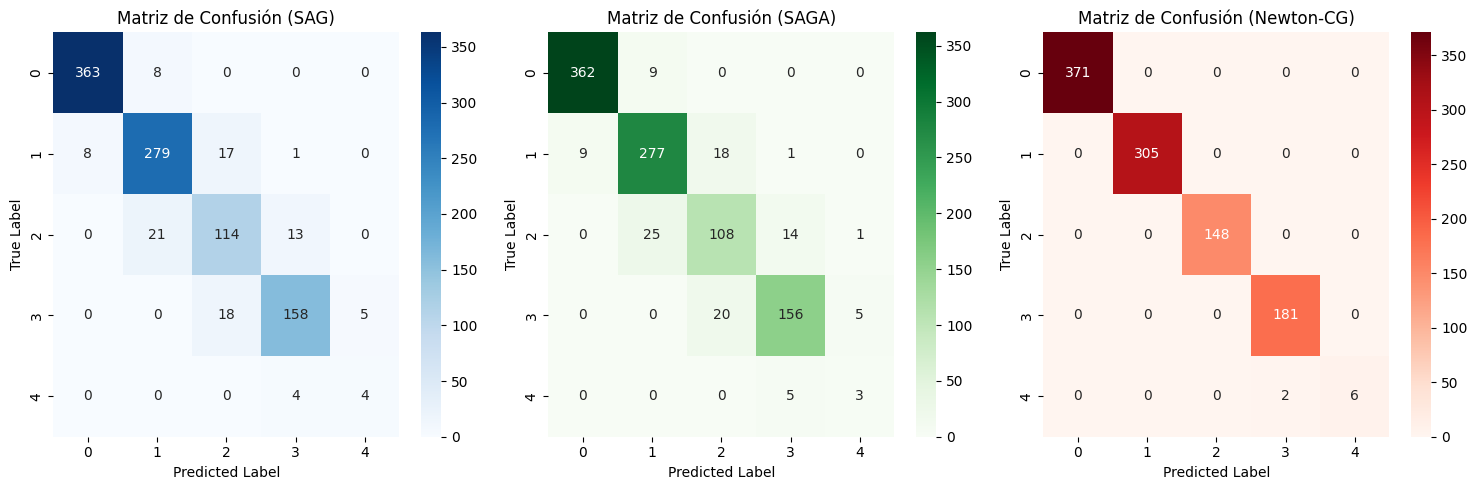

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figuras y ejes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Matriz de confusión con SAG
sns.heatmap(conf_matrix_sag, annot=True, cmap='Blues', fmt='d', ax=ax[0])
ax[0].set_title('Matriz de Confusión (SAG)')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Matriz de confusión con SAGA
sns.heatmap(conf_matrix_saga, annot=True, cmap='Greens', fmt='d', ax=ax[1])
ax[1].set_title('Matriz de Confusión (SAGA)')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

# Matriz de confusión con Newton-CG
sns.heatmap(conf_matrix_newton_cg, annot=True, cmap='Reds', fmt='d', ax=ax[2])
ax[2].set_title('Matriz de Confusión (Newton-CG)')
ax[2].set_xlabel('Predicted Label')
ax[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


Comparando visualmente las matrices de confusión, podemos ver cómo cada solver se comporta en términos de predicciones correctas e incorrectas para cada clase.

En este caso, el solver Newton-CG obtiene un rendimiento excepcionalmente alto, con solo unos pocos errores en la clasificación de las clases.

SAG y SAGA también muestran buenos resultados, aunque presentan algunos errores más en comparación con Newton-CG.

##CONCLUSION

A partir de los resultados obtenidos con el **modelo de regresión logística** utilizando el **solver Newton-CG**, podemos sacar algunas conclusiones sobre cómo usar este modelo y sus capacidades para predecir las categorías de FindRisk_New:

**Alta precisión:** El modelo tiene una precisión muy alta, cercana al 1.0, lo que significa que es capaz de hacer predicciones casi perfectas sobre las categorías de FindRisk_New. Esto es importante, ya que el objetivo principal de un modelo de clasificación es hacer predicciones precisas.

**Baja cantidad de errores:** La matriz de confusión muestra que el modelo tiene pocos errores en la clasificación de las diferentes clases de FindRisk_New. Esto es evidente en la cantidad de verdaderos positivos (TP) y verdaderos negativos (TN) que tiene el modelo, lo que indica que acierta en la mayoría de las predicciones.

**Buen rendimiento en todas las clases:** El modelo muestra un rendimiento sólido en todas las clases de FindRisk_New. La precisión, recall y f1-score son altos para cada clase, lo que significa que el modelo puede predecir correctamente cada categoría sin favorecer una clase en particular.

**Potencial para detectar riesgos:** Dado que el modelo es capaz de clasificar correctamente a los individuos en diferentes niveles de riesgo de contraer diabetes en los próximos 10 años, se puede utilizar para identificar a aquellos que están en alto riesgo y podrían necesitar una atención médica más temprana y/o cambios en su estilo de vida para prevenir el desarrollo de la enfermedad.

**Relevancia para análisis epidemiológicos:** El modelo puede ser útil en análisis epidemiológicos para identificar grupos de población con diferentes niveles de riesgo de diabetes y ayudar en la toma de decisiones de políticas de salud pública.

**Importancia de variables predictivas:** A partir de los coeficientes obtenidos en el modelo, se puede analizar la importancia de cada variable en la predicción del riesgo de diabetes. Esto podría proporcionar información útil para comprender qué factores están más fuertemente asociados con el riesgo y orientar futuras investigaciones.

En resumen, el **modelo de regresión logística con el solver Newton-CG** es una herramienta potente y precisa para predecir las categorías de FindRisk_New y podría ser de gran utilidad en la identificación temprana y prevención de la diabetes en la población. Sin embargo, es importante tener en cuenta que cualquier modelo predictivo debe ser validado en diferentes conjuntos de datos y escenarios antes de ser implementado en aplicaciones clínicas o de salud pública.

##IV ENCUESTA DE FACTORES DE RIESGO (ENFR)



El objetivo principal de esta encuesta es proporcionar información válida, confiable y oportuna sobre **factores de riesgo** (como consumo de tabaco, alcohol, alimentación, actividad física, entre otros), procesos de atención en el sistema de salud y principales **enfermedades no transmisibles** **(ENT)** (hipertensión, diabetes, obesidad y otras) en la **población de 18 años y más**, residente en viviendas particulares de **áreas urbanas de 5.000 y más habitantes** de la República Argentina.


####**ESTRUCTURA DE LA ENCUESTA**
La encuesta se relevó mediante la aplicación de un cuestionario durante una entrevista presencial en la vivienda.
El cuestionario está conformado por dos bloques: el **bloque Hogar** y el **bloque individual**.

**BLOQUE HOGAR (BH)**

Destinado a relevar datos sobre condiciones habitacionales, así como características demográficas y educativas de todas las personas que conforman el hogar y datos laborales del jefe del hogar, cuya estructura de capítulos se detalla a continuación:

*   Detección de viviendas y hogares (DV)
*   Componentes del hogar (CH)
*   Caraterísticas de la vivienda (CV)
*   Carácterísticas del hogar (CH)
*   Ingresos del hogar (IH)
*   Situación laboral del jefe o jefa del hogar (SL)



**BLOQUE INDIVIDAUL (BI)**

Destinado a registrar datos laborales, así como información sobre los factores de riesgo de las **enfermedades no transmisibles (ENT)** .

El bloque individual se aplicó a un único componente seleccionado entre los integrantes del hogar de 18 años y más. La selección del encuestado se realizó a través de la aplicación de la tabla de selección de Kish.

Para el bloque individual, la entrevista fue personal, es decir, el seleccionado debía contestar por sí mismo.

Este **bloque se subdividió en tres partes**, de acuerdo a los pasos para los que debían proveer información.

**Paso 1**

Capítulos correspondientes a la **información por autorreporte**.

*   Situación laboral (SL)
*   Salud general (SG)
*   Actividad física (AF)
*   Tabaco (TA)
*   Hipertensión arterial (HA)
*   Peso corporal (PC)
*   Alimentación (AL)
*   Colesterol (CO)
*   Consumo de alcohol (CA)
*   Diabetes (DM)
*   Lesiones (LE)
*   Prácticas preventivas (PP)
*   Prevención de cáncer colorrectal (CC)

**Paso 2**

Se relevó en el capítulo “Mediciones antropométricas” (MA). Se utilizó para registrar las mediciones de la presión arterial, del peso, de la talla y del perímetro de la cintura, realizadas con el instrumental correspondiente de acuerdo a las recomendaciones internacionales.

**Paso 3**

Se relevó en el capítulo “Mediciones bioquímicas” (MQ), que registró los valores de glucemia capilar y colesterol total obtenidos mediante la utilización de una lanceta para extraer una gota de sangre aplicada en tiras reactivas que se introdujeron en un analizador de química seca.


####**CARACTERISTICAS DE LA MUESTRA**


**Dominios de Estimación**

La encuesta por diseño tiene dominios de estimación diferentes para cada uno de los pasos.
**Desde el punto de vista de la muestra, el 100% de las viviendas seleccionadas para el operativo forman parte del Paso 1**, lo cual permite, además de resultados al nivel del total del país, su desagregación a nivel de 6 regiones:

1.	Gran Buenos Ares: Ciudad Autónoma de Buenos Ares y los partidos del Gran Buenos Aires,
2.	Noroeste: Catamarca, Jujuy, Salta, Tucumán, La Rioja y Santiago del Estero.
3.	Noreste: Chaco, Corrientes, Formosa y Misiones.
4.	Cuyo: Mendoza, San Juan y San Luis.
5.	Pampeana: Córdoba, Santa Fe, Entre Ríos, La Pampa y el resto de los partidos de la provincia de Buenos Aires.
6.	Patagonia: Chubut, Neuquén, Río Negro, Santa Cruz y Tierra del Fuego.

Permite, asimismo, desagregarlos para las 24 jurisdicciones de primer orden (23 provincias y la CABA), y para cada uno de los ocho aglomerados urbanos de más de 500.000 habitantes: Gran Buenos Aires, Gran Córdoba, Gran La Plata, Gran Mendoza, Gran Rosario, Gran Salta, Gran Tucumán y Mar del Plata.

**Para el Paso 2**, de **mediciones físicas y antropomórficas**, y como consecuencia de la reducción de la muestra de viviendas en un 25% señalada, las estimaciones responden al total del país. En cambio, **para el Paso 3, al ser un recorte geográfico de la muestra del Paso 2**, se define un único dominio compuesto por el conjunto de aglomerados o localidades de 150.000 habitantes y más.

De las 49.170 viviendas seleccionadas se obtuvieron 31.426 hogares con respuesta.
De esos hogares, **29.224 personas respondieron el Paso 1** (se corresponde con el total de registros de la base de usuario).
Sobre las viviendas encuestables, la tasa de respuesta fue del 73,4%.

De las 36.870 viviendas seleccionadas para el Paso 2, se obtuvo respuesta para 23.556 hogares, en los cuales 16.577 personas respondieron a las mediciones físicas y antropométricas; y, finalmente, de las 17.390 viviendas seleccionadas para el Paso 3 se consiguió respuesta para 10.355 hogares y 5.331 mediciones bioquímicas.


Fuente:  [Manual de uso de la Base de Datos usuario](https://www.indec.gob.ar/ftp/cuadros/menusuperior/enfr/manual_base_usuario_enfr2018.pdf  )




---

